Variables:              
- dat_tr - data per one trial (one regione of one mouse, just white noise)            
- dat_stan/aw - data per one state of the mouse (anest/awake)              
- dat_sean/aw - data per session                   
- df_corr_an/aw - dataframe of correlation (correlation matrix)
- top50_change_tr - info: num_tr, mouse, region, session, position

##### Importing required packages and libraries 

In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from cmath import nan
from sklearn.metrics import confusion_matrix

##### Defining the parameters for the plotting
- Axis size (x and y dimensions, defined in cm as it will be printed on paper)
- Font: Helvetica/Arial (I switch all anyway to Helvetica later)
- Font Size: 6 (point)
- Axis range (x and y)
- Axis ticks (eg. in your last plots, I would not have the 0.5's as tick marks, just 1:6)
- Axis tick direction/length: always "out" and always 0.5 mm 
- Axis tick labels (sometimes these will be strings, not numerical values, like "+30" 
- Line thickness: always 0.5 point
- Line/Marker/Object colour: always an RGB-triplett
- Axis labels (also matching font and font size)
- Marker size (if applicable): always 1 mm in diameter
- Alpha Channel (lines and markers): I sometime use this to visualise a parameter. 

In [3]:
x_label = 'x osa'
y_label = 'y osa'
line_color = [1.0, 0.5, 0.25]
x_size = 7
y_size = 5
legend = ["Distance"]
tick_dir = 'out'
tick_len = 0.5
tick_wid = 1


In [4]:

font_name = 'Helvetica'
font_size = 10
x_range = 250 
y_range = 250

x_ticks = 1
y_ticks = 1


tick_labels = ['+30', '0', '-30', '-60', '-90']


line_thickness = 0.5

marker_color = [14,106,193]
object_color = [89,190,250]
marker_size = 1
alpha_line = "?"
alpha_marker = "?"

In [5]:
time = np.arange(0., 10., 0.2)
velocity = np.zeros_like(time, dtype=float)
distance = np.zeros_like(time, dtype=float)
g = 9.8 	
velocity = g * time
distance = 0.5 * g * np.power(time, 2)

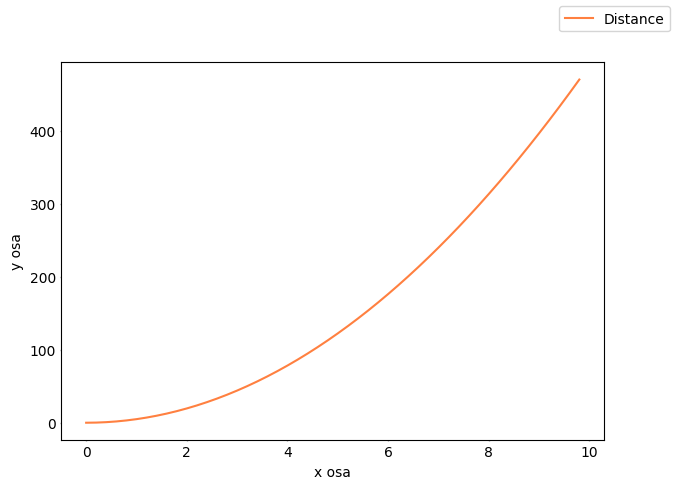

In [6]:
fig, ax1 = plt.subplots()

ax1.set_ylabel(y_label)
ax1.set_xlabel(x_label)
ax1.plot(time, distance, color = line_color)
ax1.tick_params(direction = tick_dir, length = tick_len, width = tick_wid)

fig.set_size_inches(x_size, y_size)
fig.set_dpi(100)
fig.legend(legend)
plt.show()

##### Loading .mat files - respPeak = peak of ind, allROIPositions

In [7]:
''' 
mat_load = sio.loadmat('C:/Users/Zephyrus/Desktop/respPeak.mat')['x']
roi_load = sio.loadmat('C:/Users/Zephyrus/Desktop/allROIPositions.mat')['allROIPositions']
ind_load = sio.loadmat('C:/Users/Zephyrus/Desktop/blFinalHit.mat')['blFinalHit']
'''
mat_load = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/respPeak.mat')['x']
roi_load = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/allROIPositions.mat')['allROIPositions']
ind_load = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/blFinalHit.mat')['blFinalHit']

In [8]:
'''
list1 = sio.loadmat('C:/Users/Zephyrus/Desktop/indicesSession1.mat')['indSess1']
list2 = sio.loadmat('C:/Users/Zephyrus/Desktop/List2.mat')['List2']
list3 = sio.loadmat('C:/Users/Zephyrus/Desktop/List3.mat')['List3']
list4 = sio.loadmat('C:/Users/Zephyrus/Desktop/List4.mat')['List4']
'''

list1 = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/indicesSession1.mat')['indSess1']
list2 = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/List2.mat')['List2']
list3 = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/List3.mat')['List3']
list4 = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/List4.mat')['List4']

In [9]:
'''
tune1 = sio.loadmat('C:/Users/Zephyrus/Desktop/tuneSpec1.mat')['tuneSpecificity1']
tune2 = sio.loadmat('C:/Users/Zephyrus/Desktop/tuneSpec2.mat')['tuneSpecificity2']
tune3 = sio.loadmat('C:/Users/Zephyrus/Desktop/tuneSpec3.mat')['tuneSpecificity3']
tune4 = sio.loadmat('C:/Users/Zephyrus/Desktop/tuneSpec4.mat')['tuneSpecificity4']
'''

tune1 = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/tuneSpec1.mat')['tuneSpecificity1']
tune2 = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/tuneSpec2.mat')['tuneSpecificity2']
tune3 = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/tuneSpec3.mat')['tuneSpecificity3']
tune4 = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/tuneSpec4.mat')['tuneSpecificity4']

In [10]:
'''
tune1_cat = sio.loadmat('C:/Users/Zephyrus/Desktop/tuneCat1.mat')['tuneCat1']
tune2_cat = sio.loadmat('C:/Users/Zephyrus/Desktop/tuneCat2.mat')['tuneCat2']
tune3_cat = sio.loadmat('C:/Users/Zephyrus/Desktop/tuneCat3.mat')['tuneCat3']
tune4_cat = sio.loadmat('C:/Users/Zephyrus/Desktop/tuneCat4.mat')['tuneCat4']
'''

tune1_cat = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/tuneCat1.mat')['tuneCat1']
tune2_cat = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/tuneCat2.mat')['tuneCat2']
tune3_cat = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/tuneCat3.mat')['tuneCat3']
tune4_cat = sio.loadmat('C:/Users/m.nedeljkovic/Desktop/tuneCat4.mat')['tuneCat4']

In [11]:
lista = [[k[0] for k in list1], [k[0] for k in list2], [k[0] for k in list3], [k[0] for k in list4]]
tune = [tune1, tune2, tune3, tune4]
tune_cat = [tune1_cat, tune2_cat, tune3_cat, tune4_cat]

##### General functions

In [12]:
#Dividing data into trials, anst state and awake state

def divide_data(index, trial, mat_load, ind_load):

    index[trial] = index[trial] + index[trial-1]
    dat_tr = mat_load[index[trial-1] : index[trial]+1, :, :, 0, :, :]
    ind_tr = ind_load[index[trial-1] : index[trial]+1, :, :, 0, :, :]

    #choose state
    dat_stan = dat_tr[:, 0, :, :, :]
    dat_staw = dat_tr[:, 1, :, :, :]
    ind_stan = ind_tr[:, 0, :, :, :]
    ind_staw = ind_tr[:, 1, :, :, :]
    
    return index, dat_tr, dat_stan, dat_staw, ind_stan, ind_staw

In [13]:
#make dict to convert to dataframe and computing correlation

def make_dict(index, trial, lista, dat_sean, dat_seaw, ind_sean, ind_seaw):

    dat_df_an = []
    dat_df_aw = []
    ind_df_an = []
    ind_df_aw = []
    for matrix in range(0,np.shape(dat_sean)[0]-1):
        if(index[trial-1]+matrix in lista):
            dat_df_an.append(dat_sean[matrix].flatten())
            dat_df_aw.append(dat_seaw[matrix].flatten())
            ind_df_an.append(ind_sean[matrix].flatten())
            ind_df_aw.append(ind_seaw[matrix].flatten())
    dat_df_an = pd.DataFrame(dat_df_an)*pd.DataFrame(ind_df_an)
    dat_df_aw = pd.DataFrame(dat_df_aw)*pd.DataFrame(ind_df_aw)
    dat_df_an = dat_df_an.T.corr()
    dat_df_aw = dat_df_aw.T.corr()
    return dat_df_an, dat_df_aw

def make_dict_one_speaker(index, trial, lista, dat_sean, dat_seaw, num, ind_sean, ind_seaw):
    
    dat_df_an = []
    dat_df_aw = []
    ind_df_an = []
    ind_df_aw = []
    for matrix in range(0,np.shape(dat_sean)[0]-1):
        if(index[trial-1]+matrix in lista):
            dat_df_an.append(dat_sean[matrix][num])
            dat_df_aw.append(dat_seaw[matrix][num])
            ind_df_an.append(ind_sean[matrix][num])
            ind_df_aw.append(ind_seaw[matrix][num])
    dat_df_an = pd.DataFrame(dat_df_an)*pd.DataFrame(ind_df_an)
    dat_df_aw = pd.DataFrame(dat_df_aw)*pd.DataFrame(ind_df_aw)

    dat_df_an = pd.DataFrame(dat_df_an).T.corr()
    dat_df_aw = pd.DataFrame(dat_df_aw).T.corr()
    return dat_df_an, dat_df_aw

In [14]:
#exclude the rows/columns which index is not in the other dataframe
def exclude_nan(dat_df_an, dat_df_aw):

    df_corr_an = dat_df_an.dropna(how='all', axis=1).dropna(how='all', axis=0)
    df_corr_aw = dat_df_aw.dropna(how='all', axis=1).dropna(how='all', axis=0)

    mask = df_corr_aw.index.isin(df_corr_an.index)
    df_corr_aw = df_corr_aw.loc[mask]
    mask = df_corr_an.index.isin(df_corr_aw.index)
    df_corr_an = df_corr_an.loc[mask]
    mask = []
    for x in df_corr_an.columns:
        if x not in df_corr_aw.columns:
            mask.append(x)
    df_corr_an = df_corr_an.drop(columns=mask)
    mask = []
    for x in df_corr_aw.columns:
        if x not in df_corr_an.columns:
            mask.append(x)
    df_corr_aw = df_corr_aw.drop(columns=mask)

    return df_corr_an, df_corr_aw

##### Noise correlation of the neurons (first-anes, second-awake)

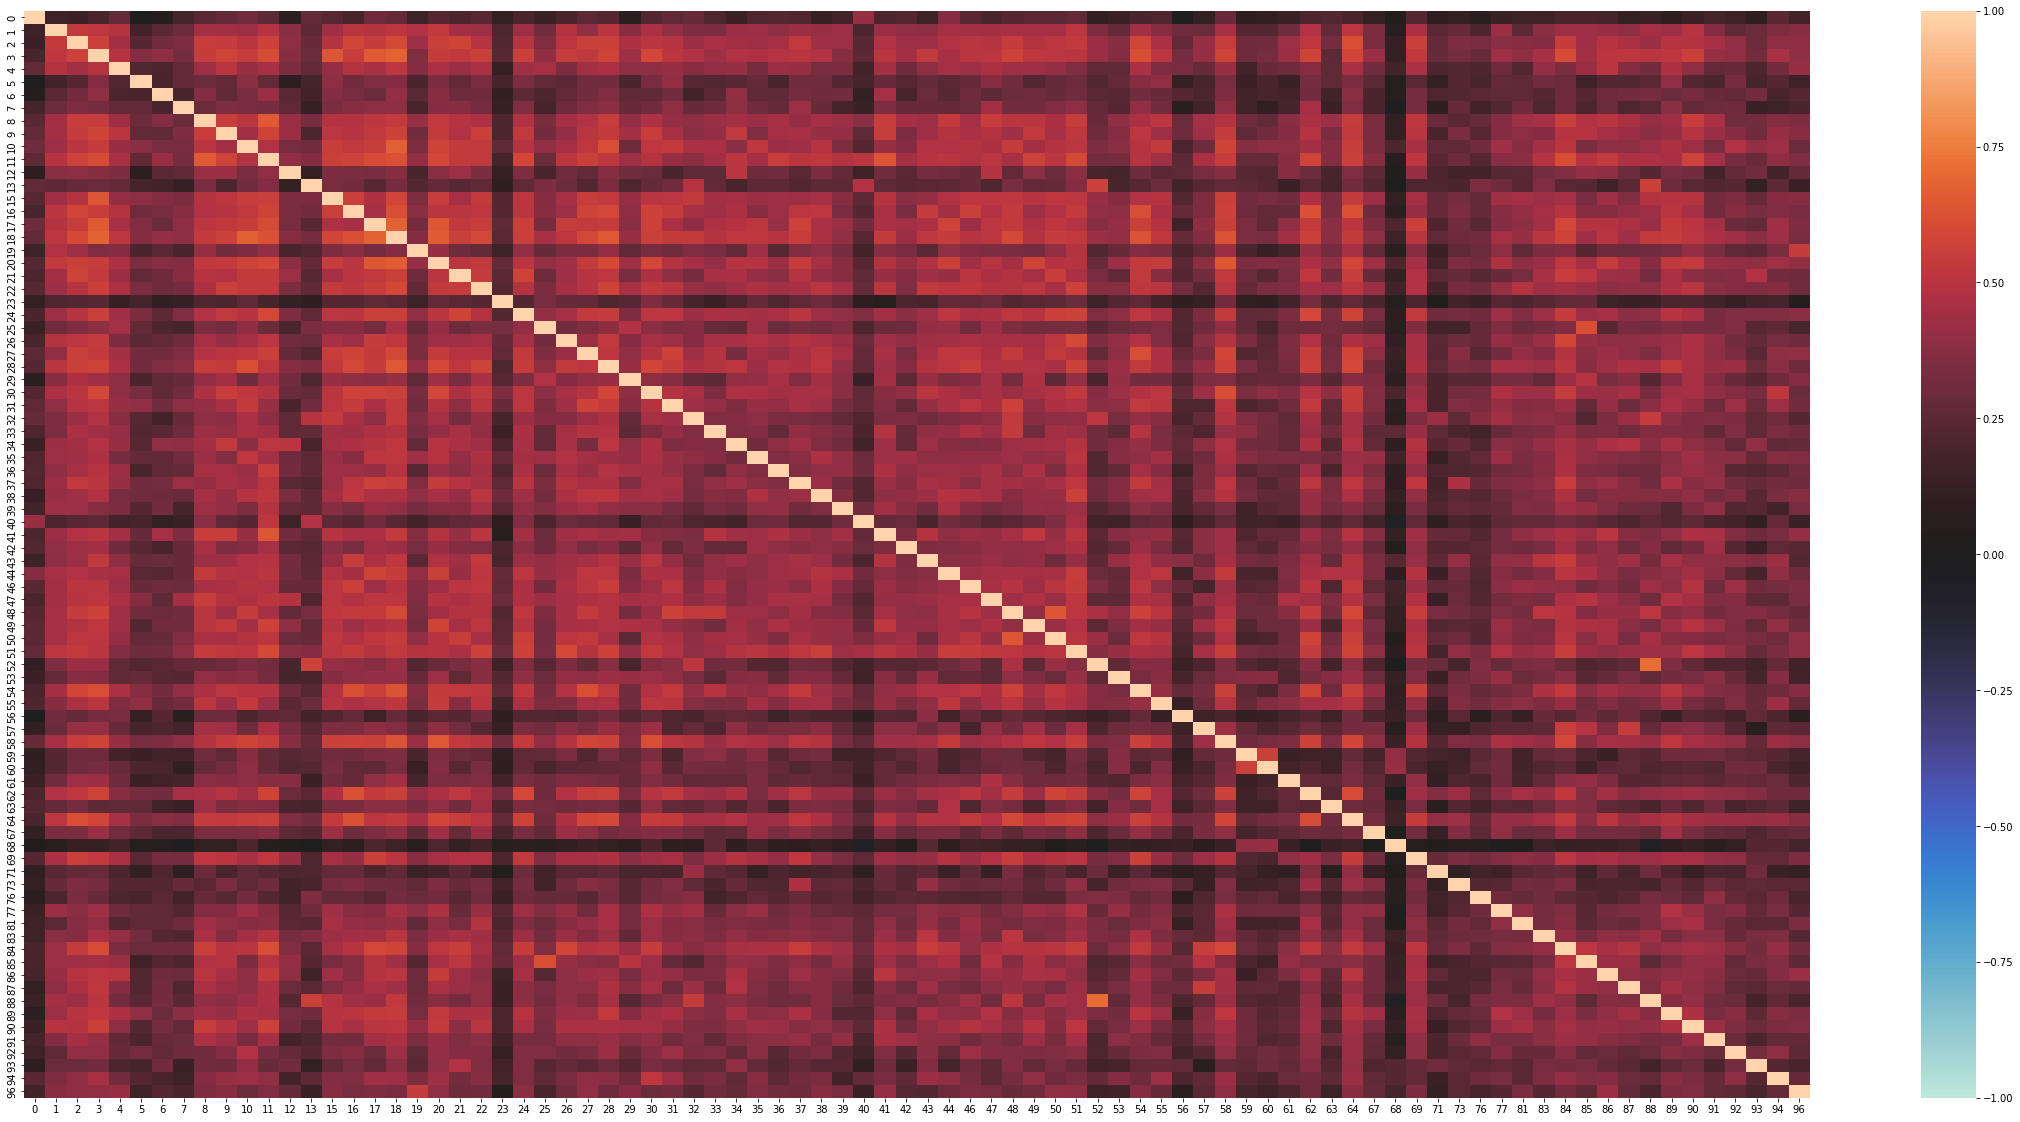

In [15]:
#lenghts of each trial
index = [0, 118, 88, 100, 98, 109, 78, 121, 76, 113, 97, 112, 118]

for trial in range(1,len(index)):
    
    index, dat_tr, dat_stan, dat_staw, ind_stan, ind_staw = divide_data(index, trial, mat_load, ind_load)
    
    for sesion in range(4):

        f,ax = plt.subplots(sharey=False,figsize=(40, 20))

        #choose session
        dat_sean = dat_stan[:, sesion, :, :]
        dat_seaw = dat_staw[:, sesion, :, :]
        ind_sean = ind_stan[:, sesion, :, :]
        ind_seaw = ind_staw[:, sesion, :, :]

        #make dict to convert to dataframe
        dat_df_an, dat_df_aw = make_dict(index, trial, lista[sesion], dat_sean, dat_seaw, ind_sean, ind_seaw)
        #exclude the rows/columns which index is not in the other dataframe
        df_corr_an, df_corr_aw = exclude_nan(dat_df_an, dat_df_aw)
    
        #plot the correlation matrix
        sns.heatmap(df_corr_an, vmax=1, vmin=-1, center=0)
        
        #sns.heatmap(df_corr_aw, vmax=1, vmin=-1, ax=ax2)
        #print(pd.DataFrame(np.corrcoef(np.hstack((np.matrix(dat_df_an), np.matrix(dat_df_aw))),rowvar=False)[0,1:]))
        break
    break


##### Comparing correlation matrices in the anesthetized and in the awake state

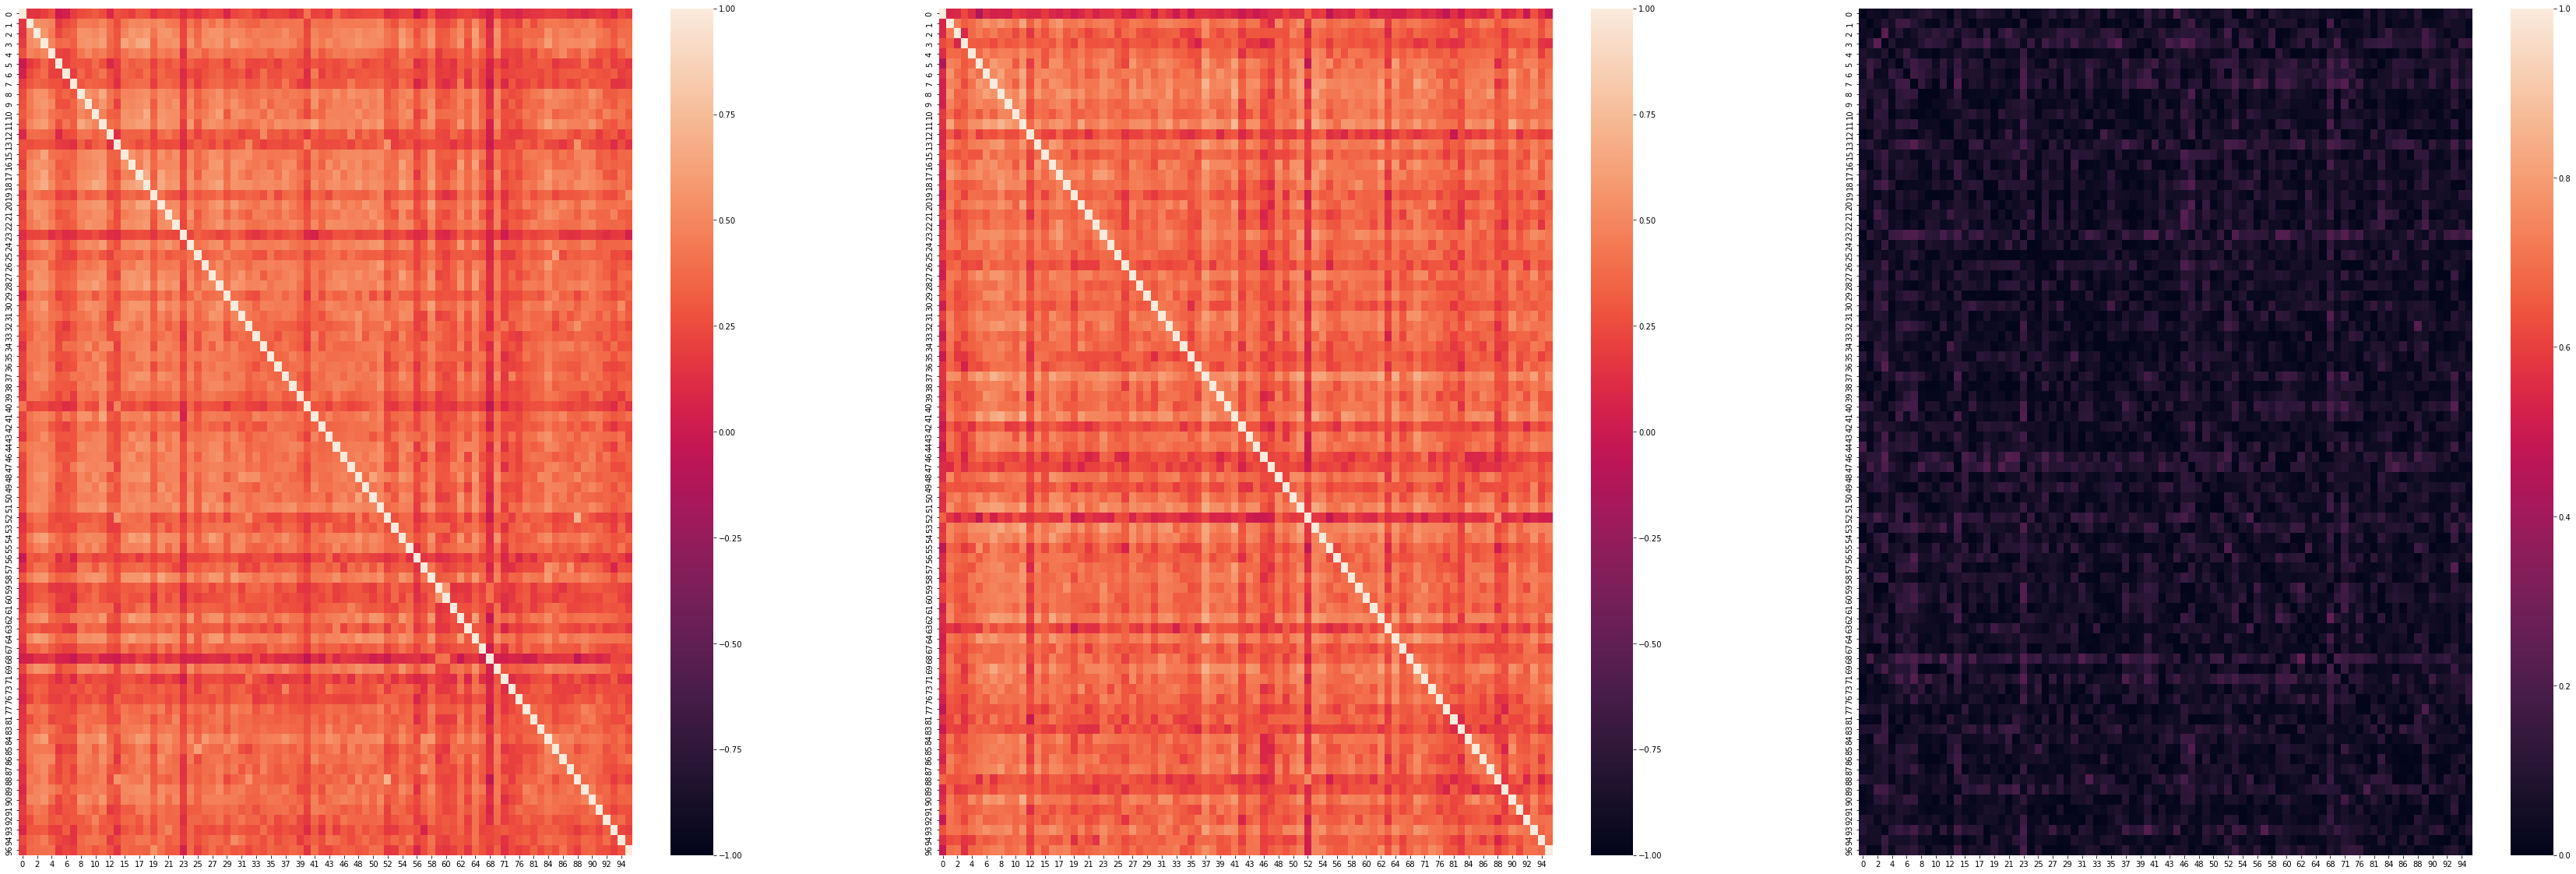

In [18]:
#lenghts of each trial
index = [0, 118, 88, 100, 98, 109, 78, 121, 76, 113, 97, 112, 118]

for trial in range(1,len(index)):
    
    index, dat_tr, dat_stan, dat_staw, ind_stan, ind_staw = divide_data(index, trial, mat_load, ind_load)
    
    for sesion in range(4):

        f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=False,figsize=(60, 20))

        #choose session
        dat_sean = dat_stan[:, sesion, :, :]
        dat_seaw = dat_staw[:, sesion, :, :]
        ind_sean = ind_stan[:, sesion, :, :]
        ind_seaw = ind_staw[:, sesion, :, :]

        #make dict to convert to dataframe
        dat_df_an, dat_df_aw = make_dict(index, trial, lista[sesion], dat_sean, dat_seaw, ind_sean, ind_seaw)

        #exclude the rows/columns which index is not in the other dataframe
        df_corr_an, df_corr_aw = exclude_nan(dat_df_an, dat_df_aw)

        #difference between the two correlation matrices
        df_corr_diff = abs(df_corr_an - df_corr_aw)/2

        #plot the correlation matrix
        sns.heatmap(df_corr_an, vmax=1, vmin=-1, ax=ax1)
        sns.heatmap(df_corr_aw, vmax=1, vmin=-1, ax=ax2)
        sns.heatmap(df_corr_diff, vmax=1, vmin=0, ax=ax3)

        break
    break

##### Top 10 anticorrelated neurons (increase/decrease) per trial

In [19]:
#lenghts of each trial
index = [0, 118, 88, 100, 98, 109, 78, 121, 76, 113, 97, 112, 118]
all_dict = []

for trial in range(1,len(index)):
    
    index, dat_tr, dat_stan, dat_staw, ind_stan, ind_staw = divide_data(index, trial, mat_load, ind_load)
    
    for sesion in range(4):
        #choose session
        dat_sean = dat_stan[:, sesion, :, :]
        dat_seaw = dat_staw[:, sesion, :, :]
        ind_sean = ind_stan[:, sesion, :, :]
        ind_seaw = ind_staw[:, sesion, :, :]

        #make dict to convert to dataframe
        dat_df_an, dat_df_aw = make_dict(index, trial, lista[sesion], dat_sean, dat_seaw, ind_sean, ind_seaw)

        #exclude the rows/columns which index is not in the other dataframe
        df_corr_an, df_corr_aw = exclude_nan(dat_df_an, dat_df_aw)

        #difference between the two correlation matrices
        df_corr_diff_inc = (df_corr_aw - df_corr_an)
        df_corr_diff_dec = (df_corr_an - df_corr_aw)
        
        #finding max differences in the whole dataframe
        top_inc = df_corr_diff_inc.stack().nlargest(20).index.tolist()
        del top_inc[1::2]
        top_dec = df_corr_diff_dec.stack().nlargest(20).index.tolist()
        del top_dec[1::2]
    
        #saving the data as dictionary
        top_change_tr = {}
        top_change_tr['inc'] = top_inc
        top_change_tr['inc_val'] = df_corr_diff_inc.stack().nlargest(20).values.tolist()[1::2]
        top_change_tr['dec'] = top_dec
        top_change_tr['dec_val'] = df_corr_diff_dec.stack().nlargest(20).values.tolist()[1::2]
        top_change_tr['tr'] = trial
        top_change_tr['mouse'] = (trial + 1)//2
        top_change_tr['region'] = 1 if(trial%2 != 0) else 2
        top_change_tr['ses'] = sesion + 1

        all_dict.append(top_change_tr)

        del top_inc, top_dec

##### Top 50 anticorrelated neurons overall

In [20]:
vals = []
info = []

for i in all_dict:
    for j in range(10):
        vals.append(i['inc_val'][j])
        info.append([i['tr'], i['mouse'], i['region'], i['ses'], i['inc'][j]])
    for j in range(10):
        vals.append(i['dec_val'][j])
        info.append([i['tr'], i['mouse'], i['region'], i['ses'], i['dec'][j]])

vals_sort = [x for x, y in sorted(zip(vals, info), reverse=True)]
info_sort = [y for x, y in sorted(zip(vals, info), reverse=True)]

top50_change_tr = {}
top50_change_tr['vals'] = vals_sort[:50]
top50_change_tr['info'] = info_sort[:50]

##### Cumulative plot of correlations /comparing/

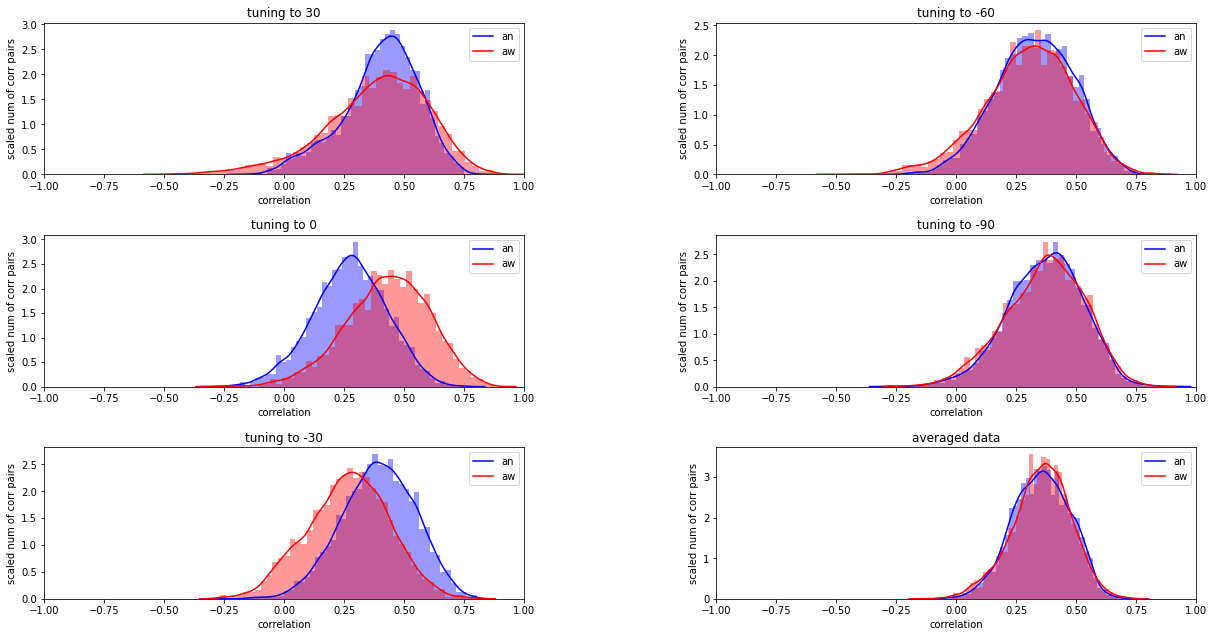

In [46]:
import warnings
warnings.filterwarnings('ignore')

#lenghts of each trial
index = [0, 118, 88, 100, 98, 109, 78, 121, 76, 113, 97, 112, 118]

for trial in range(1,len(index)):
    
    index, dat_tr, dat_stan, dat_staw, ind_stan, ind_staw = divide_data(index, trial, mat_load, ind_load)
    
    for sesion in range(4):

        #choose session
        dat_sean = dat_stan[:, sesion, :, :]
        dat_seaw = dat_staw[:, sesion, :, :]
        ind_sean = ind_stan[:, sesion, :, :]
        ind_seaw = ind_staw[:, sesion, :, :]

        #plot the correlation distribution
        f, ax = plt.subplots(3,2,figsize=(20, 10))
        for speaker in range(0,6):
            #make dict to convert to dataframe
            if(speaker==5):
                dat_df_an, dat_df_aw = make_dict(index, trial, lista[sesion], dat_sean, dat_seaw, ind_sean, ind_seaw)
            else:
                dat_df_an, dat_df_aw = make_dict_one_speaker(index, trial, lista[sesion], dat_sean, dat_seaw, speaker, ind_sean, ind_seaw)

            #exclude the rows/columns which index is not in the other dataframe
            df_corr_an, df_corr_aw = exclude_nan(dat_df_an, dat_df_aw)

            df_an_line = df_corr_an.unstack()
            so1 = df_an_line.sort_values(kind="quicksort")
            so1 = so1.drop(so1[so1 == 1].index.tolist())

            df_aw_line = df_corr_aw.unstack()
            so2 = df_aw_line.sort_values(kind="quicksort")
            so2 = so2.drop(so2[so2 == 1].index.tolist())
            
            ax[speaker%3][speaker//3].set_xlim([-1, 1])
            ax[speaker%3][speaker//3].set_xlabel('correlation')
            ax[speaker%3][speaker//3].set_ylabel('scaled num of corr pairs')
            if(speaker==5):
                ax[speaker%3][speaker//3].set_title('averaged data')
            else:
                ax[speaker%3][speaker//3].set_title('tuning to ' + str(-speaker*30 + 30))
            
            sns.distplot(so1, hist=True, color="b", ax=ax[speaker%3][speaker//3])
            sns.distplot(so2, hist=True, color="r", ax=ax[speaker%3][speaker//3])
            ax[speaker%3][speaker//3].legend(['an', 'aw'])
            plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
                    
        break
    
    break

##### Cumulative plot of correlations

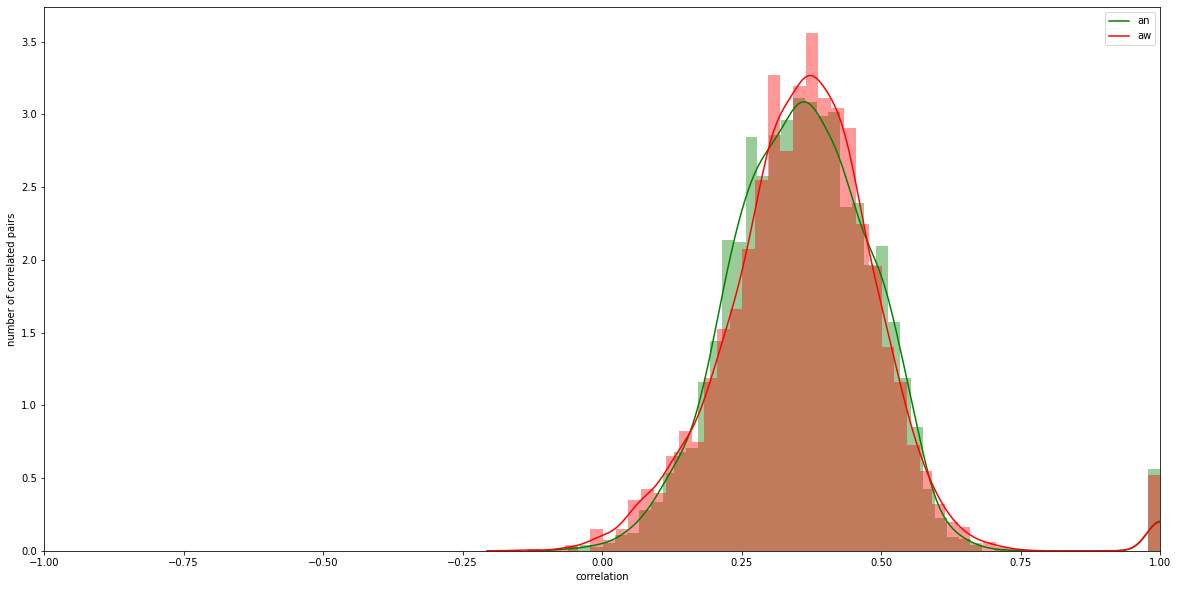

In [22]:
import warnings
warnings.filterwarnings('ignore')

#lenghts of each trial
index = [0, 118, 88, 100, 98, 109, 78, 121, 76, 113, 97, 112, 118]

for trial in range(1,len(index)):
    
    index, dat_tr, dat_stan, dat_staw, ind_stan, ind_staw = divide_data(index, trial, mat_load, ind_load)
    
    for sesion in range(4):

        #choose session
        dat_sean = dat_stan[:, sesion, :, :]
        dat_seaw = dat_staw[:, sesion, :, :]
        ind_sean = ind_stan[:, sesion, :, :]
        ind_seaw = ind_staw[:, sesion, :, :]

        #make dict to convert to dataframe
        dat_df_an, dat_df_aw = make_dict(index, trial, lista[sesion], dat_sean, dat_seaw, ind_sean, ind_seaw)

        #exclude the rows/columns which index is not in the other dataframe
        df_corr_an, df_corr_aw = exclude_nan(dat_df_an, dat_df_aw)

        df_an_line = df_corr_an.unstack()
        so1 = df_an_line.sort_values(kind="quicksort")
        df_aw_line = df_corr_aw.unstack()
        so2 = df_aw_line.sort_values(kind="quicksort")

        #plot the correlation distribution
        f, ax = plt.subplots(figsize=(20, 10))
        ax.set_xlim([-1, 1])
        ax.set_xlabel('correlation')
        ax.set_ylabel('number of correlated pairs')
        
        sns.distplot(so1, hist=True, color="g")
        sns.distplot(so2, hist=True, color="r")
        ax.legend(['an', 'aw'])

        break
    break

##### Correlation matrix of All ROI positions 

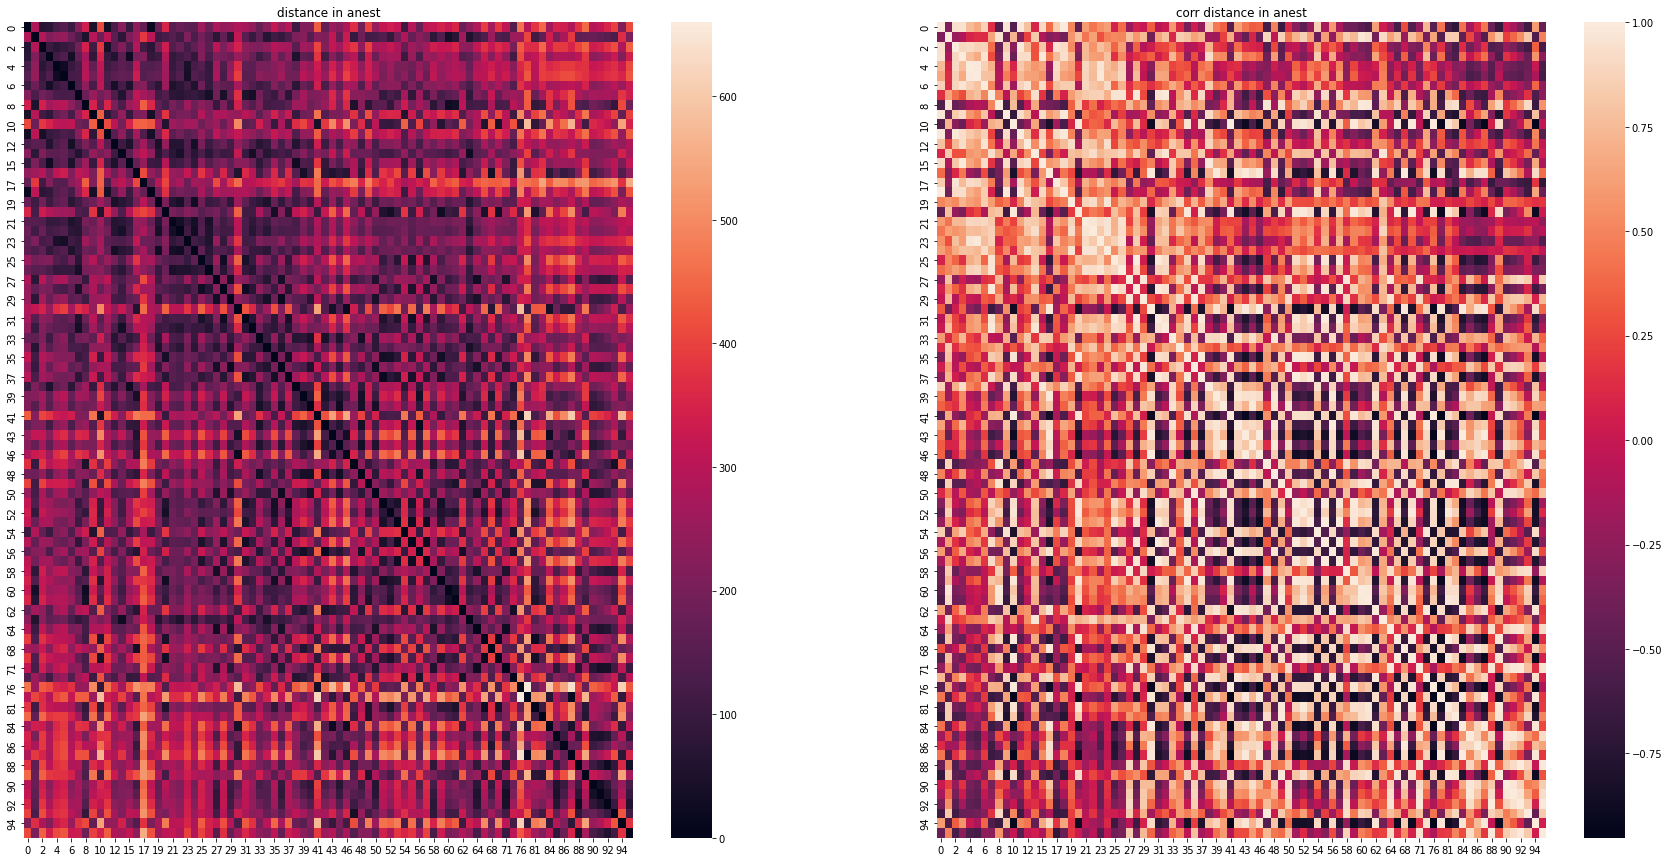

In [24]:
#distances in awake and anestatized state are simmilar, so the plot shows only the anestatized state

#lenghts of each trial
index = [0, 118, 88, 100, 98, 109, 78, 121, 76, 113, 97, 112, 118]

for trial in range(1,len(index)):
    
    index, dat_tr, dat_stan, dat_staw, ind_stan, ind_staw = divide_data(index, trial, mat_load, ind_load)
    pos_tr = roi_load[index[trial-1] : index[trial]+1, :, :, :]

    #choose state
    pos_stan = pos_tr[:, :, 0, :]
    pos_staw = pos_tr[:, :, 1, :]
    
    for sesion in range(4):

        f,(ax1,ax2) = plt.subplots(1,2,sharey=False,figsize=(30, 15))

        #choose session
        dat_sean = dat_stan[:, sesion, :, :]
        dat_seaw = dat_staw[:, sesion, :, :]
        pos_sean = pos_stan[:, :, sesion]
        pos_seaw = pos_staw[:, :, sesion]
        ind_sean = ind_stan[:, sesion, :, :]
        ind_seaw = ind_staw[:, sesion, :, :]

        #make dict to convert to dataframe
        dat_df_an, dat_df_aw = make_dict(index, trial, lista[sesion], dat_sean, dat_seaw, ind_sean, ind_seaw)
        #exclude the rows/columns which index is not in the other dataframe
        df_corr_an, df_corr_aw = exclude_nan(dat_df_an, dat_df_aw)
        
        df_corr_an_pos = pd.DataFrame(index=df_corr_an.index, columns=df_corr_an.columns)
        
        for i in df_corr_an.index:
            for j in df_corr_an.columns:
                df_corr_an_pos.loc[i, j] = np.sqrt((pos_sean[i, 0]-pos_sean[j,0])**2 + (pos_sean[i, 1]-pos_sean[j,1])**2)

        df_corr_an_pos = pd.DataFrame(df_corr_an_pos, index=None).astype(float)
        df_corr_an_pos1 = df_corr_an_pos.corr().dropna(how='all', axis=1).dropna(how='all', axis=0)

        ax1.set_title('distance in anest')
        ax2.set_title('corr distance in anest')

        #plot the correlation matrix
        sns.heatmap(df_corr_an_pos, ax=ax1)
        sns.heatmap(df_corr_an_pos1, ax=ax2)

        break
    break
    

##### Plot of correlations and positions 

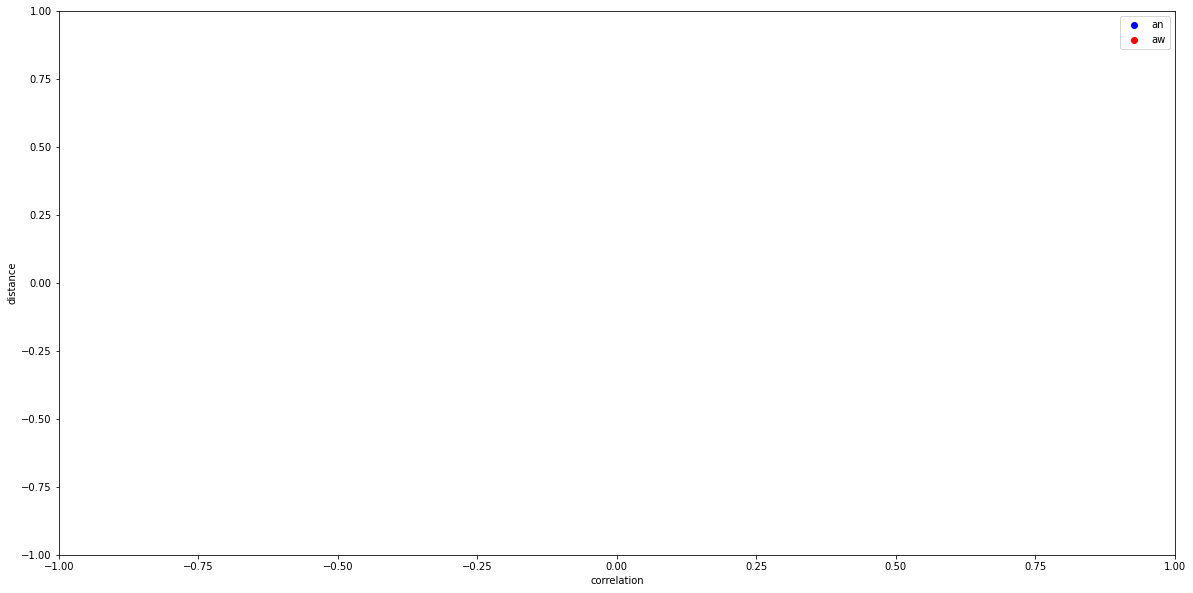

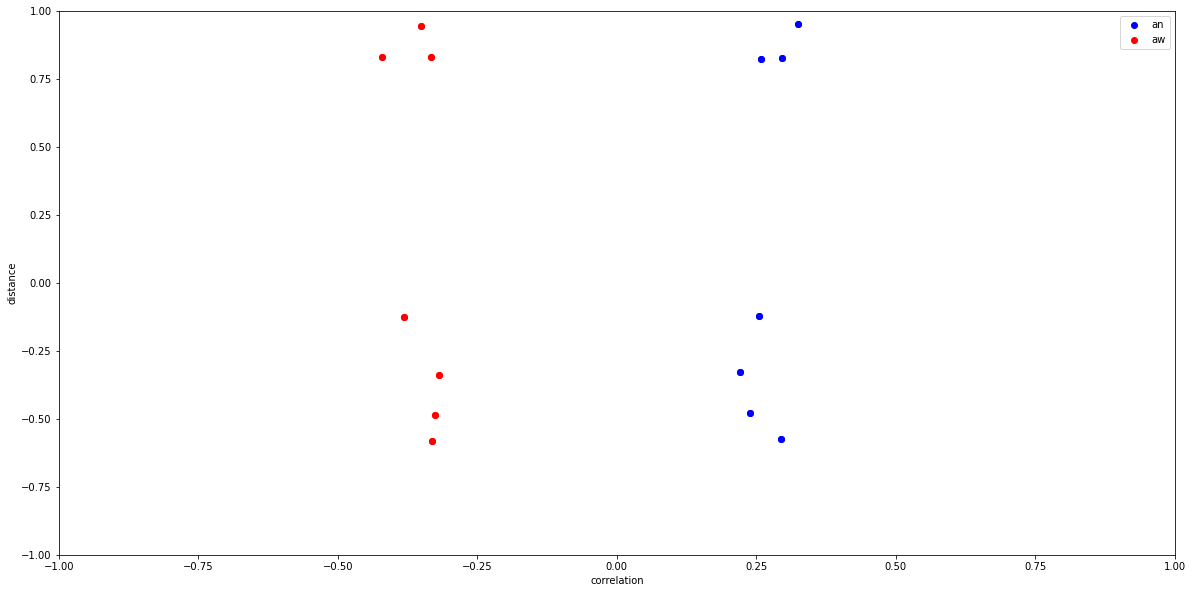

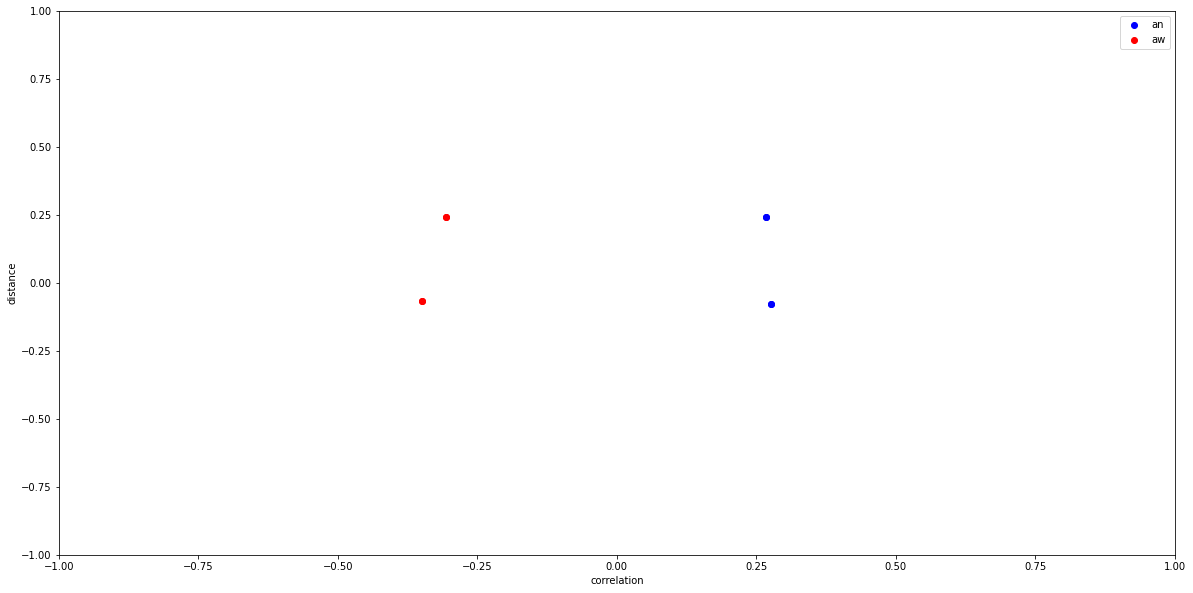

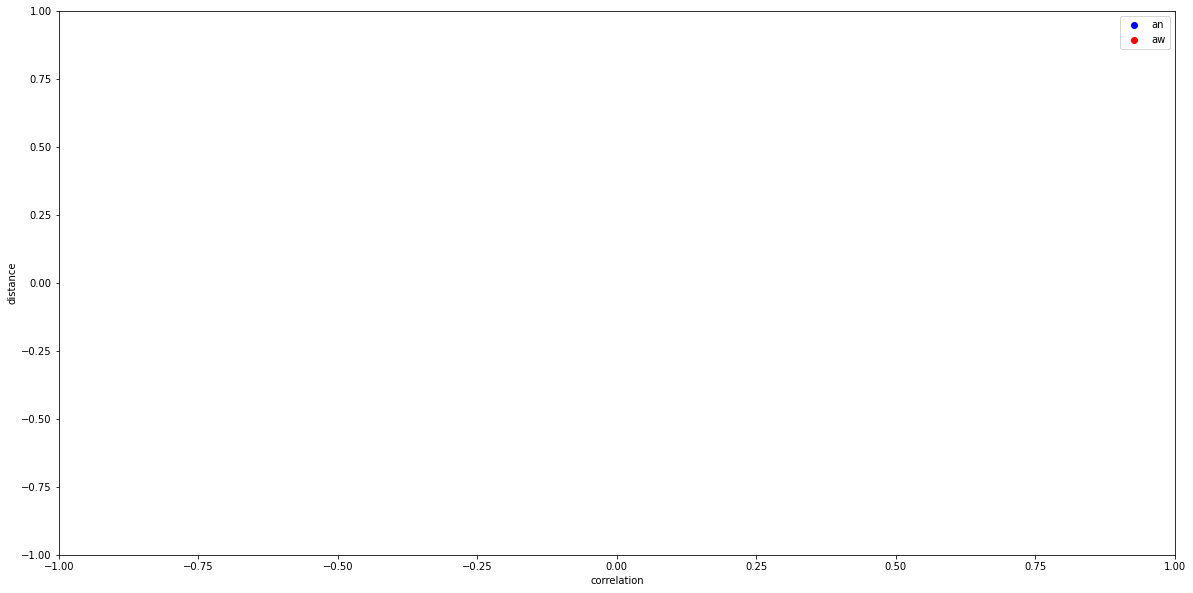

In [24]:
#lenghts of each trial
index = [0, 118, 88, 100, 98, 109, 78, 121, 76, 113, 97, 112, 118]

for trial in range(1,len(index)):
    
    index, dat_tr, dat_stan, dat_staw, ind_stan, ind_staw = divide_data(index, trial, mat_load, ind_load)
    pos_tr = roi_load[index[trial-1] : index[trial]+1, :, :, :]

    #choose state
    pos_stan = pos_tr[:, :, 0, :]
    pos_staw = pos_tr[:, :, 1, :]
    
    for sesion in range(4):

        #choose session
        dat_sean = dat_stan[:, sesion, :, :]
        dat_seaw = dat_staw[:, sesion, :, :]
        pos_sean = pos_stan[:, :, sesion]
        pos_seaw = pos_staw[:, :, sesion]
        ind_sean = ind_stan[:, sesion, :, :]
        ind_seaw = ind_staw[:, sesion, :, :]

        #make dict to convert to dataframe
        dat_df_an, dat_df_aw = make_dict(index, trial, lista[sesion], dat_sean, dat_seaw, ind_sean, ind_seaw)

        #exclude the rows/columns which index is not in the other dataframe
        df_corr_an, df_corr_aw = exclude_nan(dat_df_an, dat_df_aw)

        df_corr_an_pos = pd.DataFrame(index=df_corr_an.index, columns=df_corr_an.columns)
        df_corr_aw_pos = pd.DataFrame(index=df_corr_aw.index, columns=df_corr_aw.columns)
        
        for i in df_corr_an.index:
            for j in df_corr_an.columns:
                df_corr_an_pos.loc[i, j] = np.sqrt((pos_sean[i, 0]-pos_sean[j,0])**2 + (pos_sean[i, 1]-pos_sean[j,1])**2)
                df_corr_aw_pos.loc[i, j] = np.sqrt((pos_seaw[i, 0]-pos_seaw[j,0])**2 + (pos_seaw[i, 1]-pos_seaw[j,1])**2)

        df_corr_an_pos = pd.DataFrame(df_corr_an_pos, index=None).astype(float)
        df_corr_aw_pos = pd.DataFrame(df_corr_aw_pos, index=None).astype(float)
        df_corr_an_pos = df_corr_an_pos.corr().dropna(how='all', axis=1).dropna(how='all', axis=0)
        df_corr_aw_pos = df_corr_aw_pos.corr().dropna(how='all', axis=1).dropna(how='all', axis=0)

        #only look at the anticoorrelated ones in awake condition, and coresponding ones in anesthrized condition
        df_corr_aw[df_corr_aw > -0.3] = nan
        ll = df_corr_aw < -0.3
        df_corr_an = df_corr_an*ll
        df_corr_an[df_corr_an == 0] = nan

        #unstacking the data for plotting
        df_an_line = df_corr_an.unstack()
        df_aw_line = df_corr_aw.unstack()
        df_an_line_pos = df_corr_an_pos.unstack()
        df_aw_line_pos = df_corr_aw_pos.unstack()

        #plot the correlation distribution
        f, ax = plt.subplots(figsize=(20, 10))
        ax.set_xlim([-1, 1])
        ax.set_ylim([-1, 1])
        ax.set_xlabel('correlation')
        ax.set_ylabel('distance')

        ax.plot(df_an_line, df_an_line_pos, 'o', color='blue', label='activity')
        ax.plot(df_aw_line, df_aw_line_pos, 'o', color='red', label='awakening')
        ax.legend(['an', 'aw'])  
    
    break
    

##### Confusion matrices of correlation tuning between anes and awake state

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


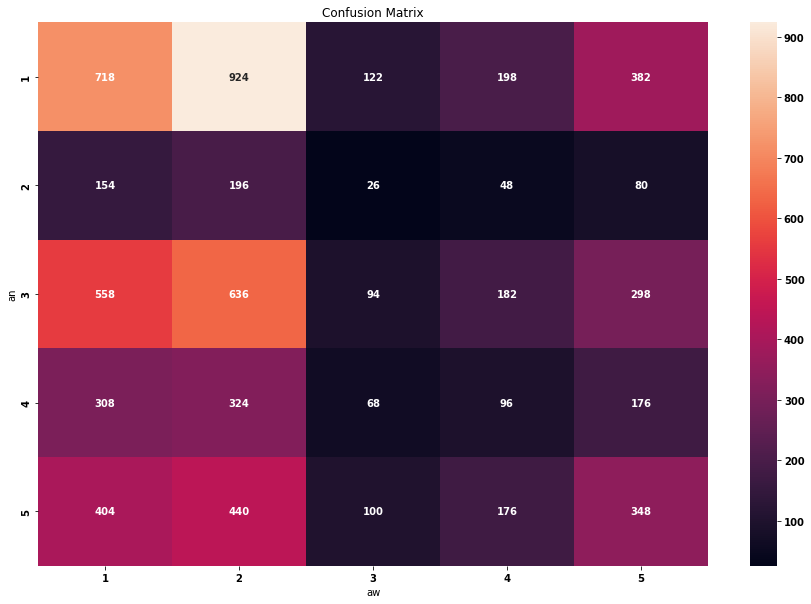

In [25]:
#lenghts of each trial
import matplotlib
index = [0, 118, 88, 100, 98, 109, 78, 121, 76, 113, 97, 112, 118]
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)


for trial in range(1,len(index)):
    
    index, dat_tr, dat_stan, dat_staw, ind_stan, ind_staw = divide_data(index, trial, mat_load, ind_load)
    
    for sesion in range(4):

        #choose session
        dat_sean = dat_stan[:, sesion, :, :]
        dat_seaw = dat_staw[:, sesion, :, :]
        ind_sean = ind_stan[:, sesion, :, :]
        ind_seaw = ind_staw[:, sesion, :, :]

        all_speakan_corr = pd.DataFrame()
        all_speakaw_corr = pd.DataFrame()

        #make dict to convert to dataframe
        for num in range(0,5):
            dat_df_an, dat_df_aw = make_dict_one_speaker(index, trial, lista[sesion], dat_sean, dat_seaw, num, ind_sean, ind_seaw)
            #exclude the rows/columns which index is not in the other dataframe
            df_corr_an, df_corr_aw = exclude_nan(dat_df_an, dat_df_aw)
            #df_corr_an, df_corr_aw = dat_df_an.dropna(how='all', axis=1).dropna(how='all', axis=0), dat_df_aw.dropna(how='all', axis=1).dropna(how='all', axis=0)
            
            df1 = df_corr_an.stack().reset_index()
            #set column names
            df1.columns = ['first', 'second', num+1]
            if(num==0):
                all_speakan_corr = df1
            else:
                all_speakan_corr[num+1] = df1[num+1]
            
            df2 = df_corr_aw.stack().reset_index()
            #set column names
            df2.columns = ['first', 'second', num+1]
            if(num==0):
                all_speakaw_corr = df2
            else:
                all_speakaw_corr[num+1] = df2[num+1]

        m = all_speakan_corr[[1,2,3,4,5]].agg(['idxmax','max'], axis=1).mask(lambda x: x['max'].eq(0))
        all_speakan_corr = all_speakan_corr.join(m, how='left')

        m = all_speakaw_corr[[1,2,3,4,5]].agg(['idxmax','max'], axis=1).mask(lambda x: x['max'].eq(0))
        all_speakaw_corr = all_speakaw_corr.join(m, how='left')
            
        compare = pd.DataFrame()    
        compare['first'], compare['second'] = all_speakan_corr['first'], all_speakan_corr['second']
        compare['an'] = all_speakan_corr['idxmax']
        compare['aw'] = all_speakaw_corr['idxmax']


        cm = confusion_matrix(compare['an'], compare['aw'])

        f,ax = plt.subplots(sharey=False,figsize=(15, 10))
        sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

        # labels, title and ticks
        ax.set_xlabel('aw');ax.set_ylabel('an'); 
        ax.set_title('Confusion Matrix'); 
        ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5']); ax.yaxis.set_ticklabels(['1', '2', '3', '4', '5'])
    
        break
    break

##### Analysis of connections between single neurons based on neurons tuning categories (avg correlation)

In [26]:
def tuning_analization(df_corr_an, tune_cat_stan):
    
    all_speakan_corr = df_corr_an.stack().reset_index()
    #set column names
    all_speakan_corr.columns = ['first', 'second', 'corr']

    tuning_1 = []
    br = 0
    for i in range(0, len(all_speakan_corr['first'])-1):
        if(all_speakan_corr['first'][i] != all_speakan_corr['first'][i+1]):
            tuning_1.append(tune_cat_stan[br])
            br+=1
        else:
            tuning_1.append(tune_cat_stan[br])
    tuning_1.append(tune_cat_stan[br])
    all_speakan_corr['tune_1'] = tuning_1 

    return all_speakan_corr

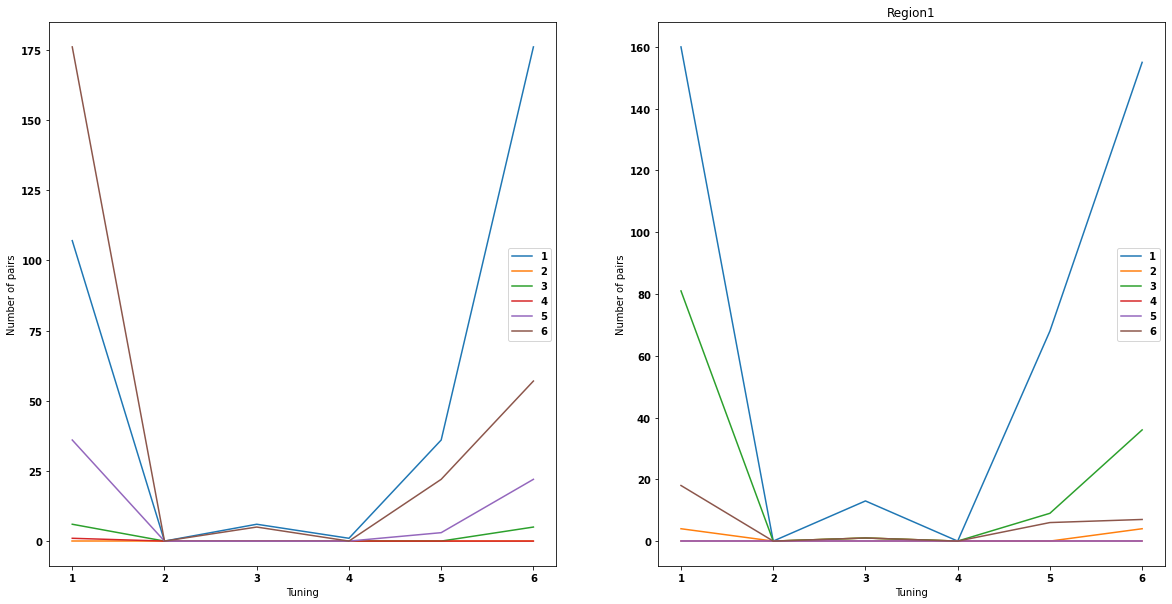

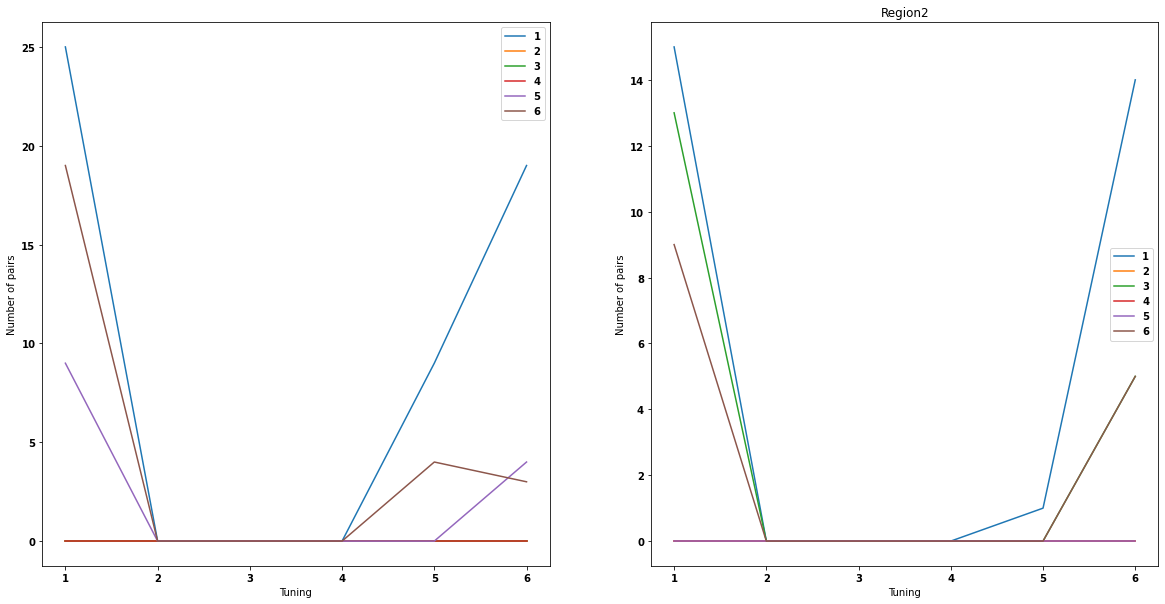

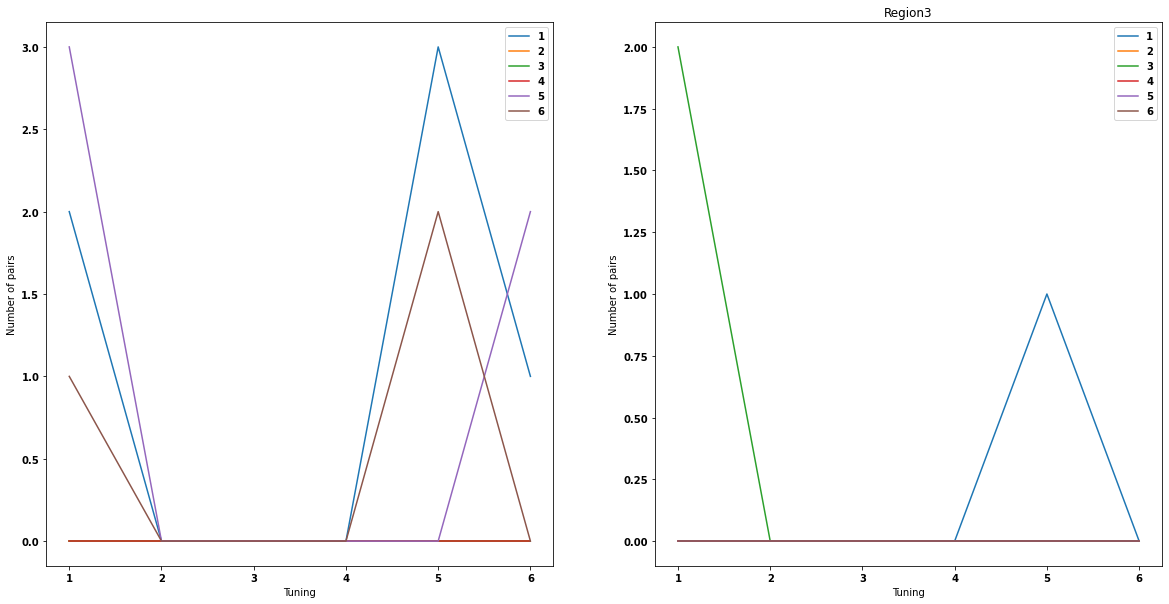

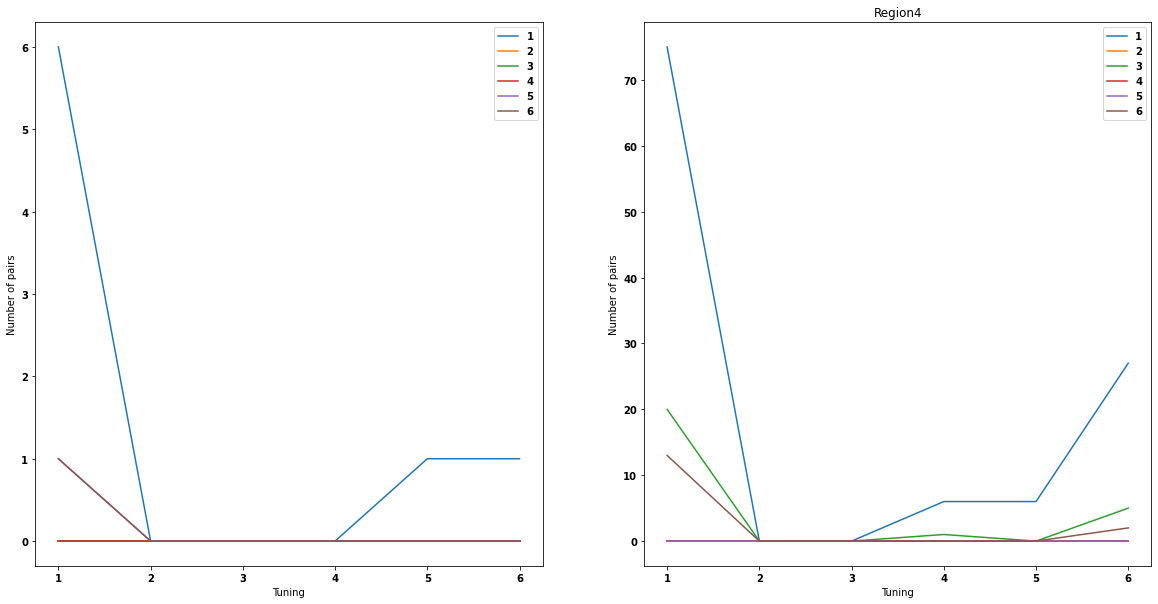

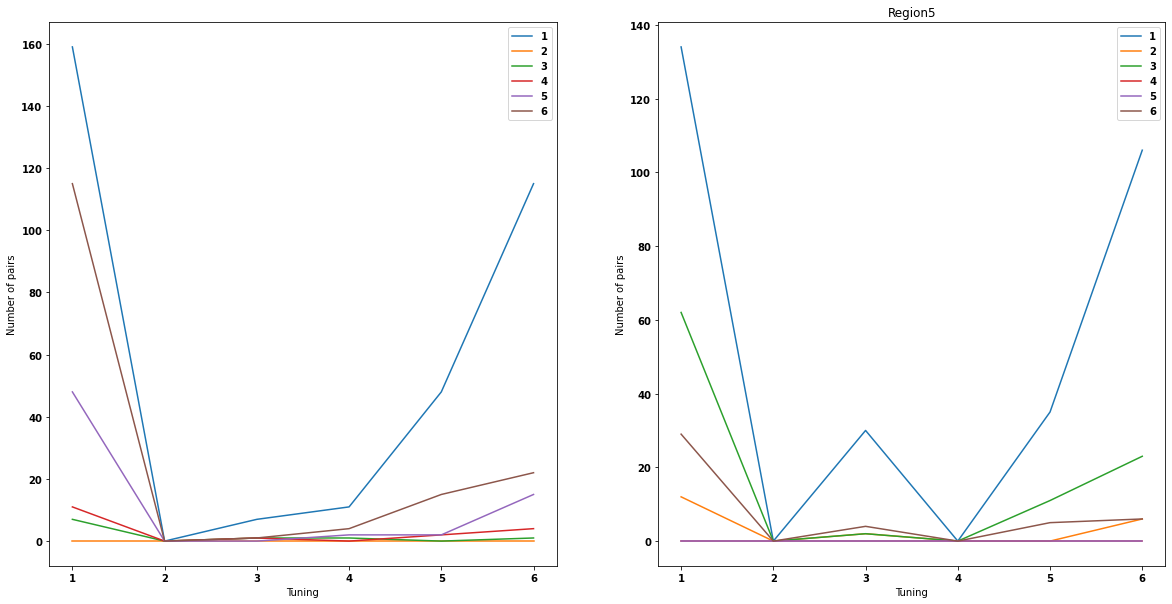

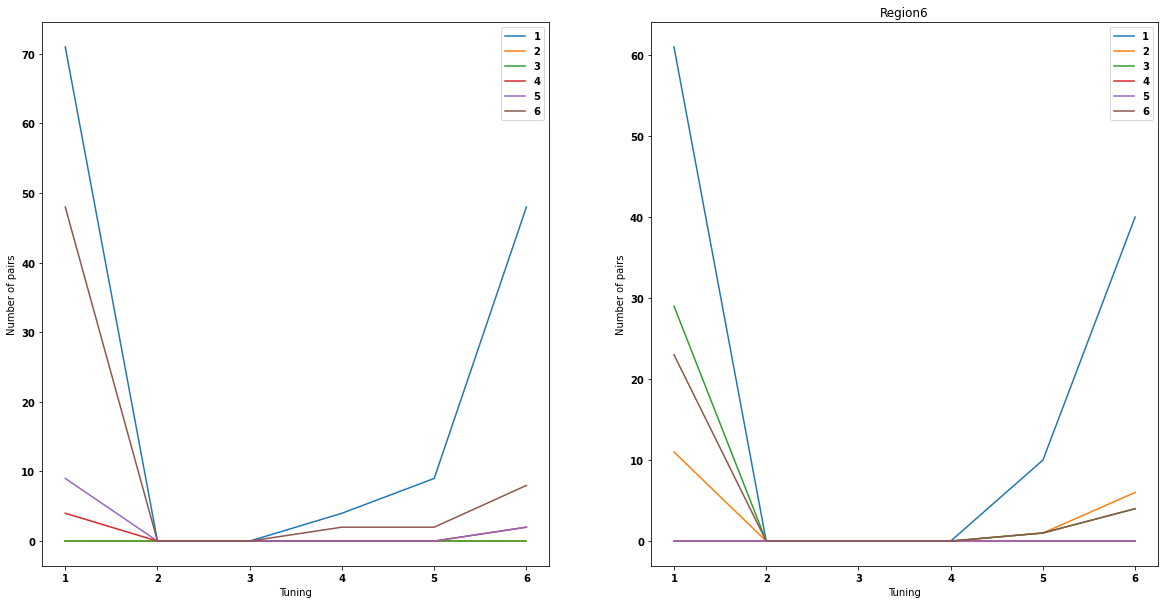

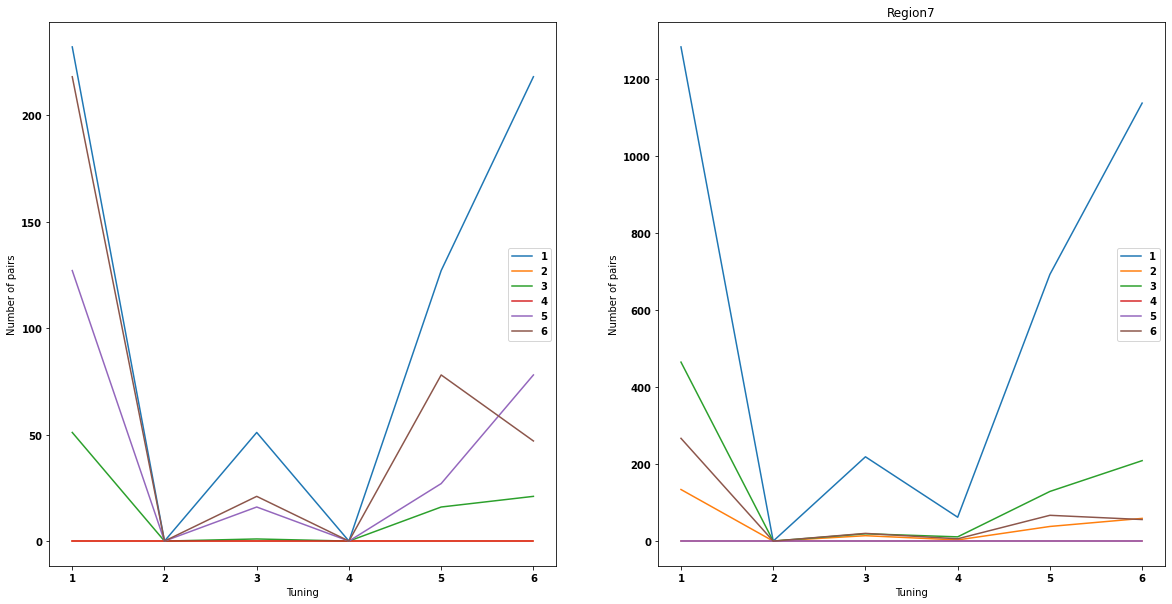

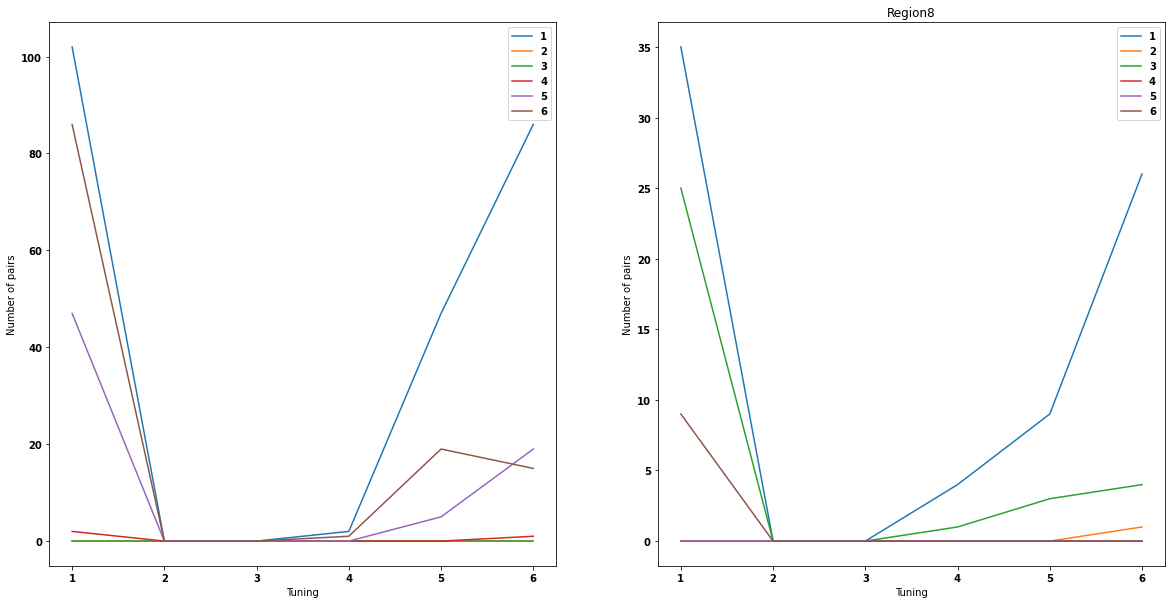

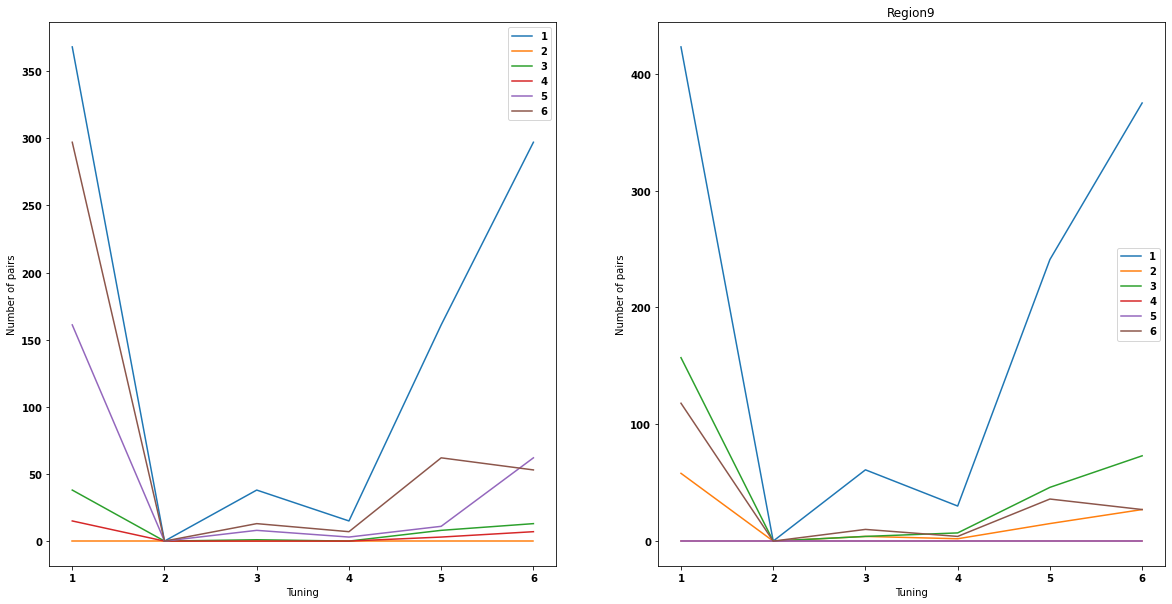

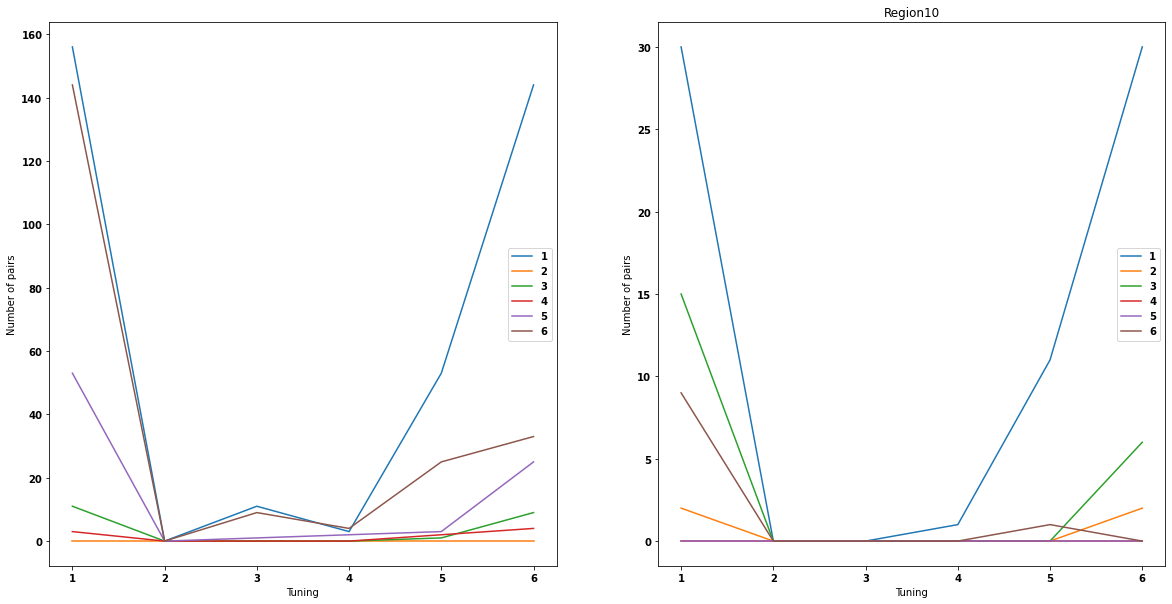

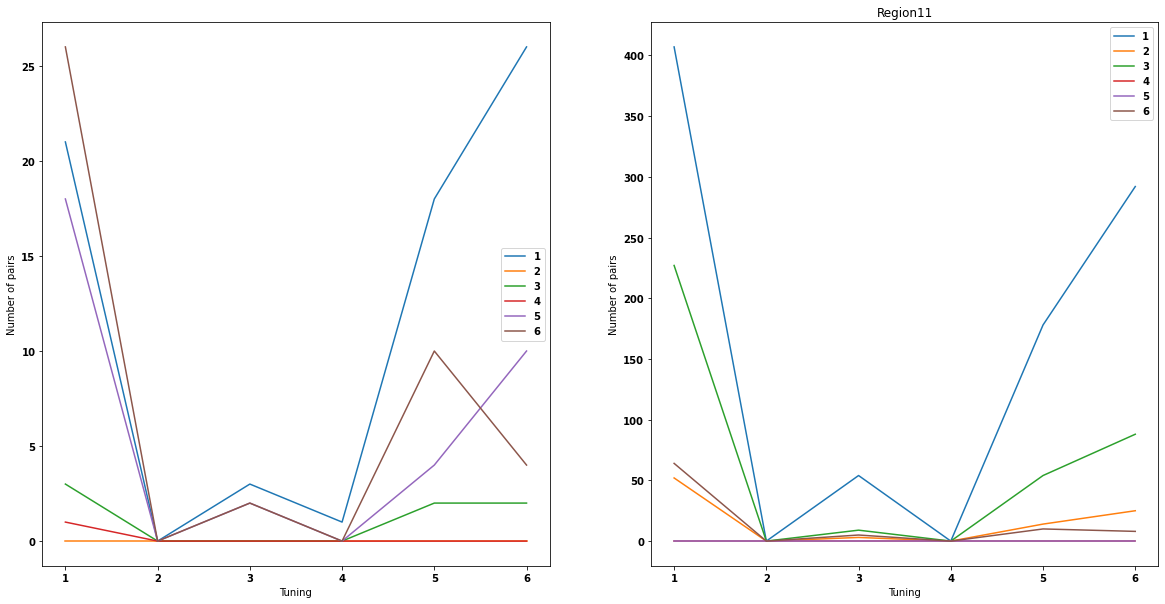

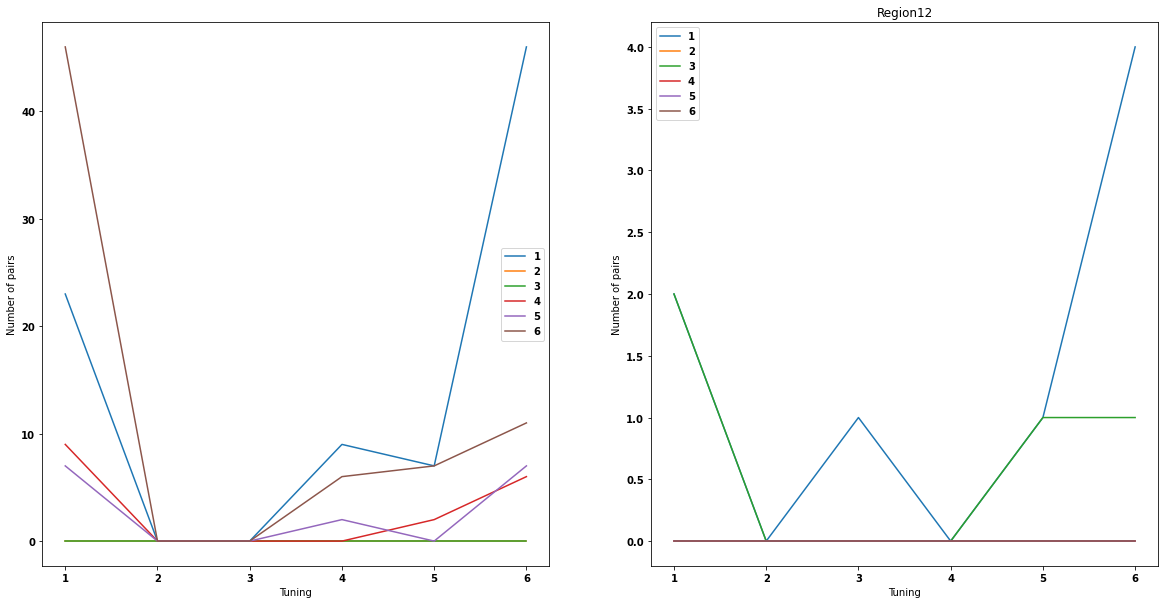

In [27]:
#lenghts of each trial
import matplotlib
index = [0, 118, 88, 100, 98, 109, 78, 121, 76, 113, 97, 112, 118]
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)
neur_cont_df = pd.DataFrame(columns=['1an', '2an', '3an', '4an', '5an', '6an' ,'1aw', '2aw', '3aw', '4aw', '5aw', '6aw'])
reg = 1
for trial in range(1,len(index)):
    
    index, dat_tr, dat_stan, dat_staw, ind_stan, ind_staw = divide_data(index, trial, mat_load, ind_load)
    
    for sesion in range(4):

        #choose session
        dat_sean = dat_stan[:, sesion, :, :]
        dat_seaw = dat_staw[:, sesion, :, :]
        ind_sean = ind_stan[:, sesion, :, :]
        ind_seaw = ind_staw[:, sesion, :, :]

        #make dict to convert to dataframe
        dat_df_an, dat_df_aw = make_dict(index, trial, lista[sesion], dat_sean, dat_seaw, ind_sean, ind_seaw)
        #exclude the rows/columns which index is not in the other dataframe
        df_corr_an, df_corr_aw = exclude_nan(dat_df_an, dat_df_aw)
        #df_corr_an, df_corr_aw = dat_df_an.dropna(how='all', axis=1).dropna(how='all', axis=0), dat_df_aw.dropna(how='all', axis=1).dropna(how='all', axis=0)
        
        tune_cat_tr = tune_cat[sesion][0 : len(df_corr_an), :, 0]
        tune_cat_stan = tune_cat_tr[:, 0]
        tune_cat_staw = tune_cat_tr[:, 1]

        #analization of the anes tuning
        all_speakan_corr = tuning_analization(df_corr_an, tune_cat_stan)
        #analization of the anes tuning
        all_speakaw_corr = tuning_analization(df_corr_aw, tune_cat_staw)

        tun_pairs = all_speakan_corr[['first', 'tune_1']].drop_duplicates()
        all_speakan_corr['tune_2'] = [int(tun_pairs.loc[tun_pairs['first'] == x]['tune_1']) for x in all_speakan_corr['second']]
        all_speakaw_corr['tune_2'] = [int(tun_pairs.loc[tun_pairs['first'] == x]['tune_1']) for x in all_speakaw_corr['second']]

        all_speakan_corr = all_speakan_corr[all_speakan_corr['first'] != all_speakan_corr['second']]
        all_speakan_corr = all_speakan_corr[all_speakan_corr['corr'] > 0.5]
        all_speakan_corr = all_speakan_corr.reset_index(drop=True)

        all_speakaw_corr = all_speakaw_corr[all_speakaw_corr['first'] != all_speakaw_corr['second']]
        all_speakaw_corr = all_speakaw_corr[all_speakaw_corr['corr'] > 0.5]
        all_speakaw_corr = all_speakaw_corr.reset_index(drop=True)

        f,(ax1,ax2) = plt.subplots(1,2,sharey=False,figsize=(20, 10))

        #plotting an tuning
        num_neuran = []
        for i in range(1,7):
            an_spectun = all_speakan_corr[all_speakan_corr['tune_1'] == i]
            cnt_neur = an_spectun.nunique()['first']
            num_neuran.append(cnt_neur)
            num_tun = []
            for j in range(1,7):
                if(i != j):
                    num_tun.append(an_spectun[an_spectun['tune_2'] == j].shape[0])
                else:
                    num_tun.append(int(an_spectun[an_spectun['tune_2'] == j].shape[0]/2))
            ax1.plot(range(1,7), num_tun)
        ax1.legend(['1', '2', '3', '4', '5', '6'])
        ax1.set_xlabel('Tuning');ax1.set_ylabel('Number of pairs')

        #plotting aw tuning
        num_neuraw = []
        for i in range(1,7):
            aw_spectun = all_speakaw_corr[all_speakaw_corr['tune_1'] == i]
            cnt_neur = aw_spectun.nunique()['first']
            num_neuraw.append(cnt_neur)
            num_tun = []
            for j in range(1,7):
                if(i != j):
                    num_tun.append(aw_spectun[aw_spectun['tune_2'] == j].shape[0])
                else:
                    num_tun.append(int(aw_spectun[aw_spectun['tune_2'] == j].shape[0]/2))
            ax2.plot(range(1,7), num_tun)
        ax2.legend(['1', '2', '3', '4', '5', '6'])
        ax2.set_xlabel('Tuning');ax2.set_ylabel('Number of pairs')

        title = "Region" + str(reg)
        reg+=1
        plt.title(title)
        plt.show()

        dfan = pd.DataFrame(num_neuran).T
        dfan.columns = ['1an', '2an', '3an', '4an', '5an', '6an']
        dfaw = pd.DataFrame(num_neuraw).T
        dfaw.columns = ['1aw', '2aw', '3aw', '4aw', '5aw', '6aw']
        df = pd.concat([dfan, dfaw], axis=1)
        neur_cont_df = neur_cont_df.append(df)
        
        break

In [28]:
print(neur_cont_df)
neur_cont_df.to_csv("C:/Users/Zephyrus/Desktop/count.csv")

  1an 2an 3an 4an 5an 6an 1aw 2aw 3aw 4aw 5aw 6aw
0  32   0   3   1   9  16  47   2   9   0   0   3
0  16   0   0   0   3   5  13   0   4   0   0   3
0   5   0   0   0   3   2   3   0   1   0   0   1
0   9   0   0   0   1   1  23   0   3   0   0   3
0  33   0   4   1   5  16  47   3  10   0   0   5
0  32   0   0   1   2  11  24   1   7   0   0   4
0  37   0   3   0  12  17  73   4  14   0   0   6
0  31   0   0   1   6  11  29   1   8   0   0   2
0  39   0   4   1   9  20  53   3  11   0   0   5
0  38   0   3   1   9  16  29   1   6   0   0   3
0  23   0   3   1   5  10  60   3  13   0   0   5
0  24   0   0   1   3  12   9   0   2   0   0   1


OSError: Cannot save file into a non-existent directory: 'C:\Users\Zephyrus\Desktop'

##### Analysis of connections between single neurons based on neurons tuning categories (max correlation)

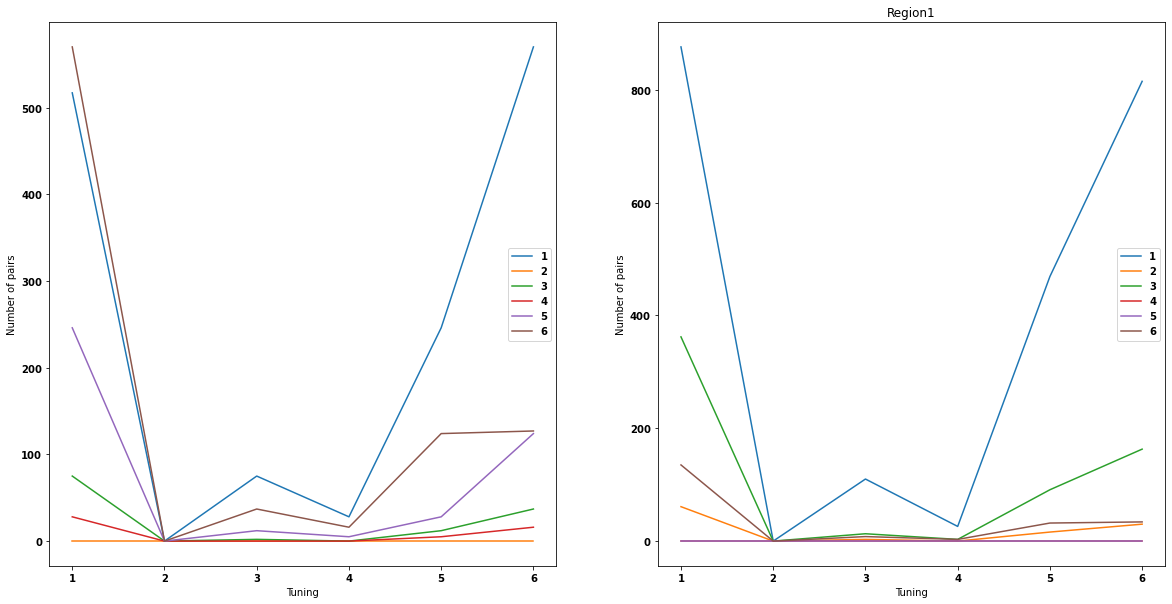

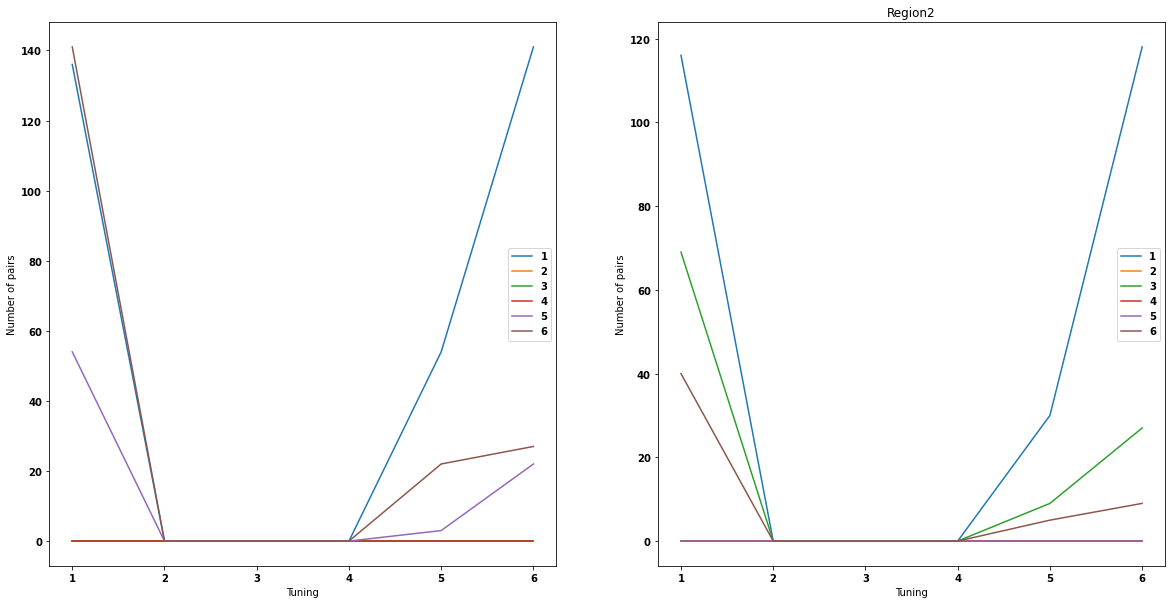

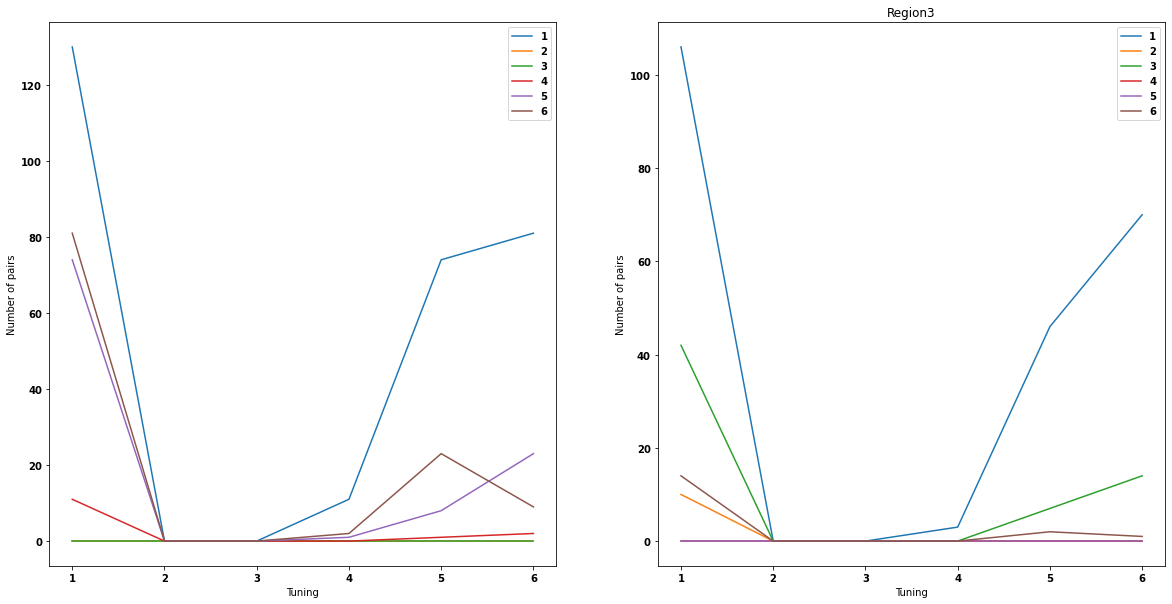

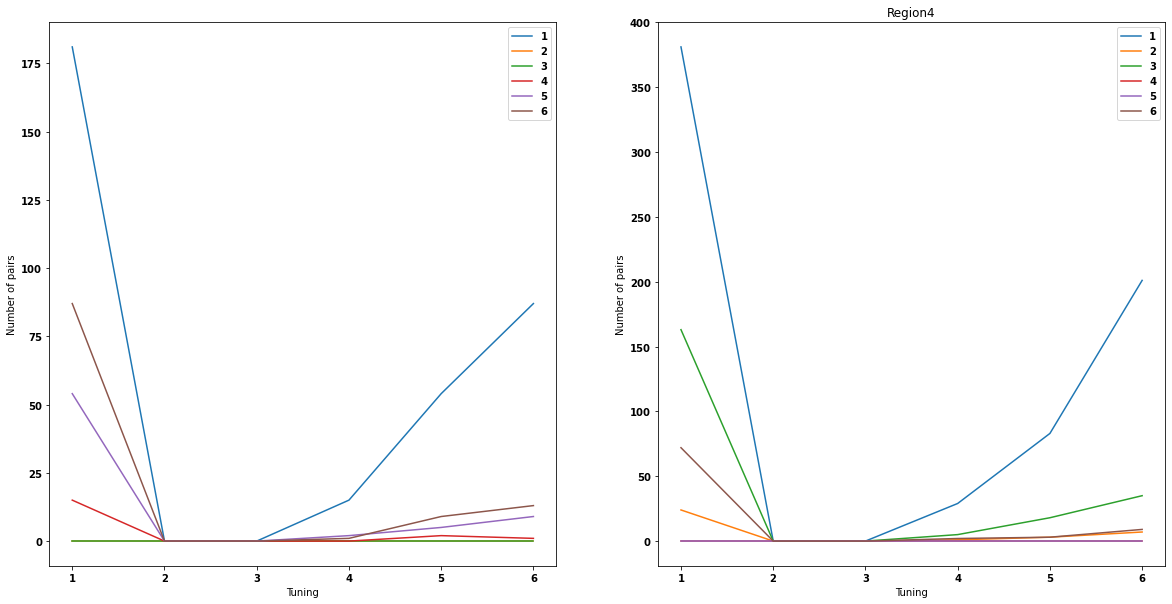

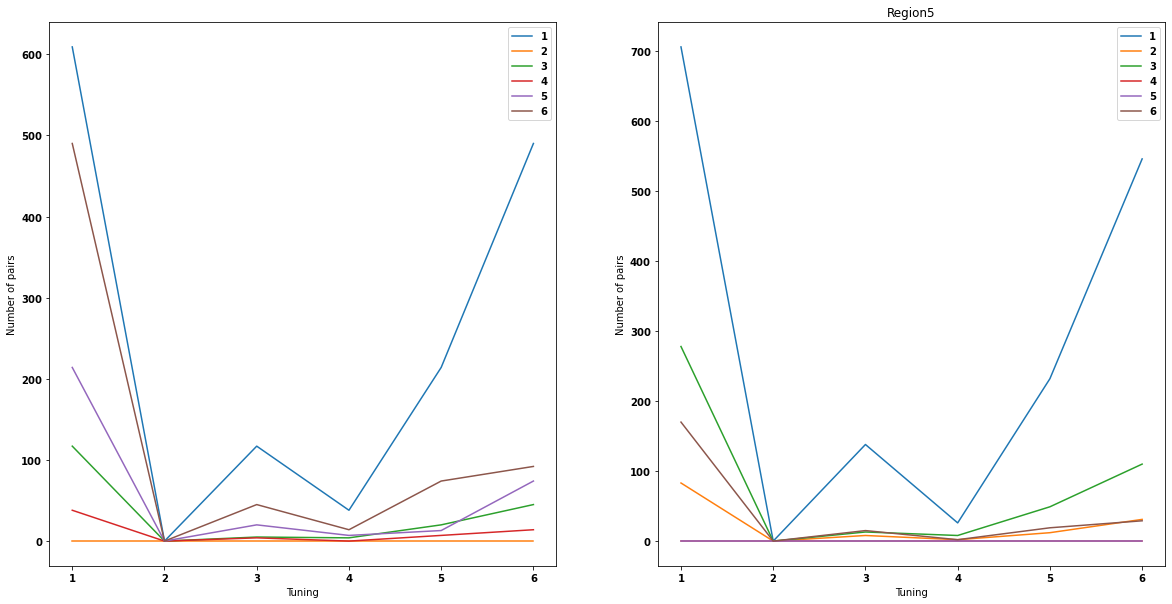

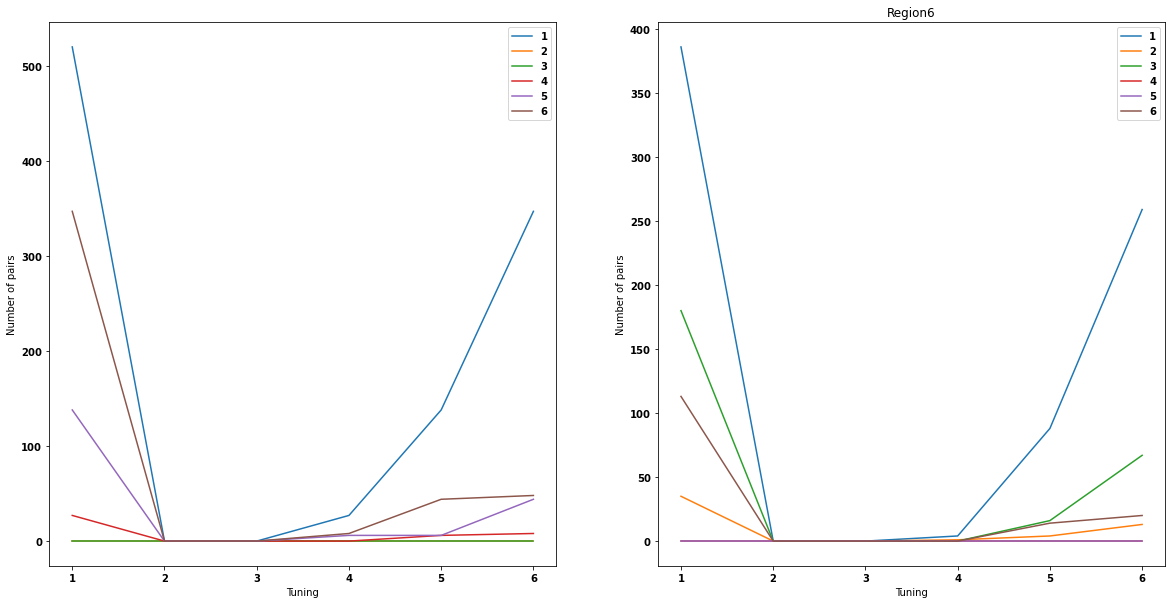

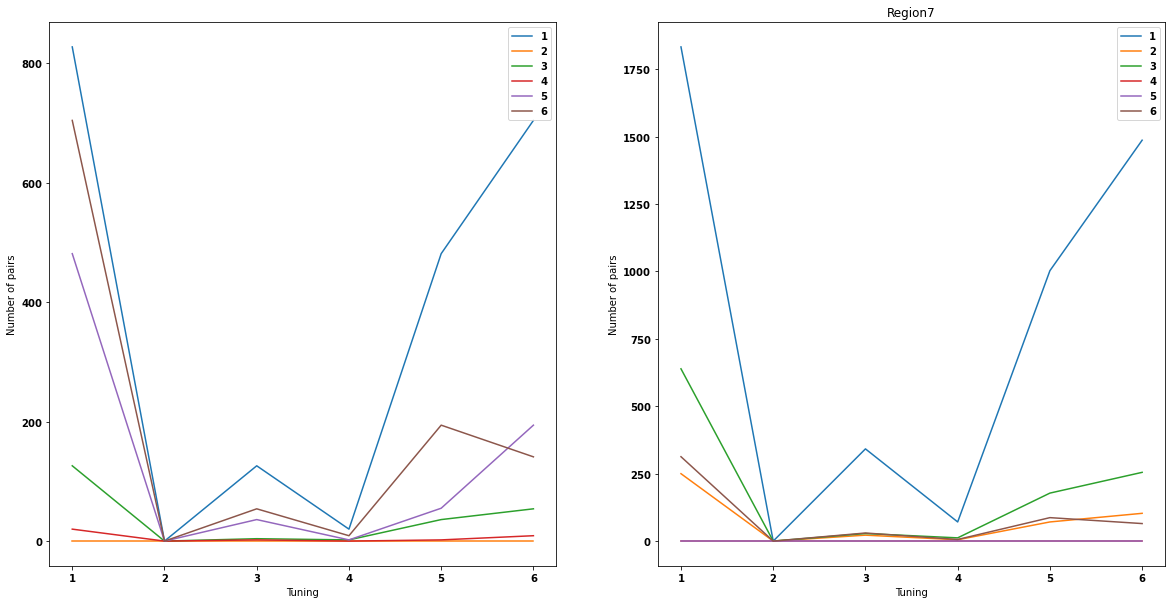

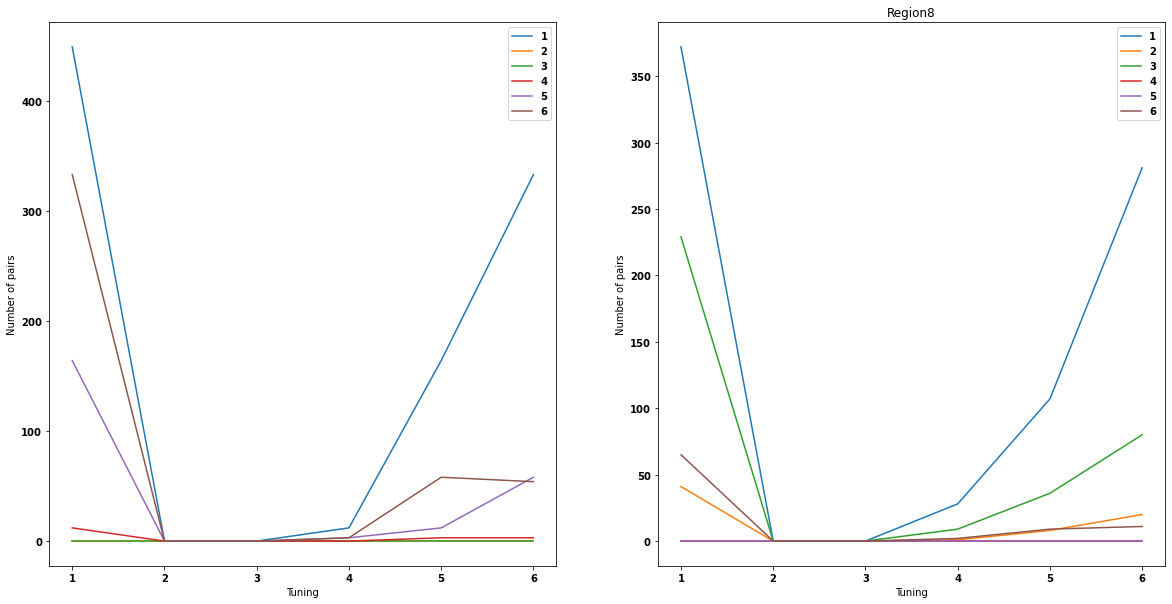

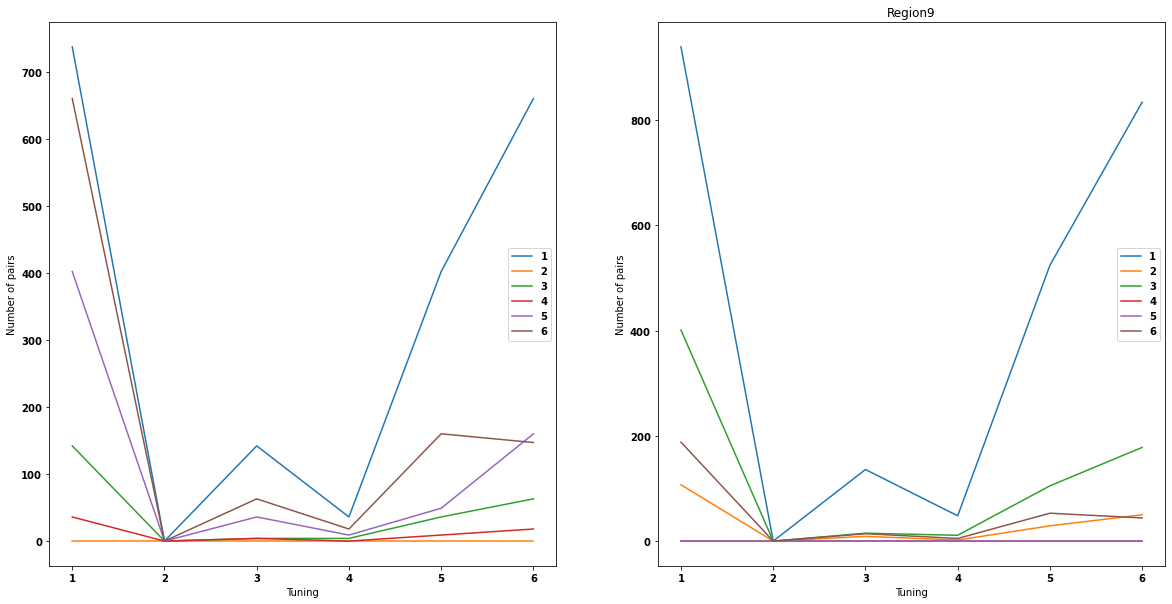

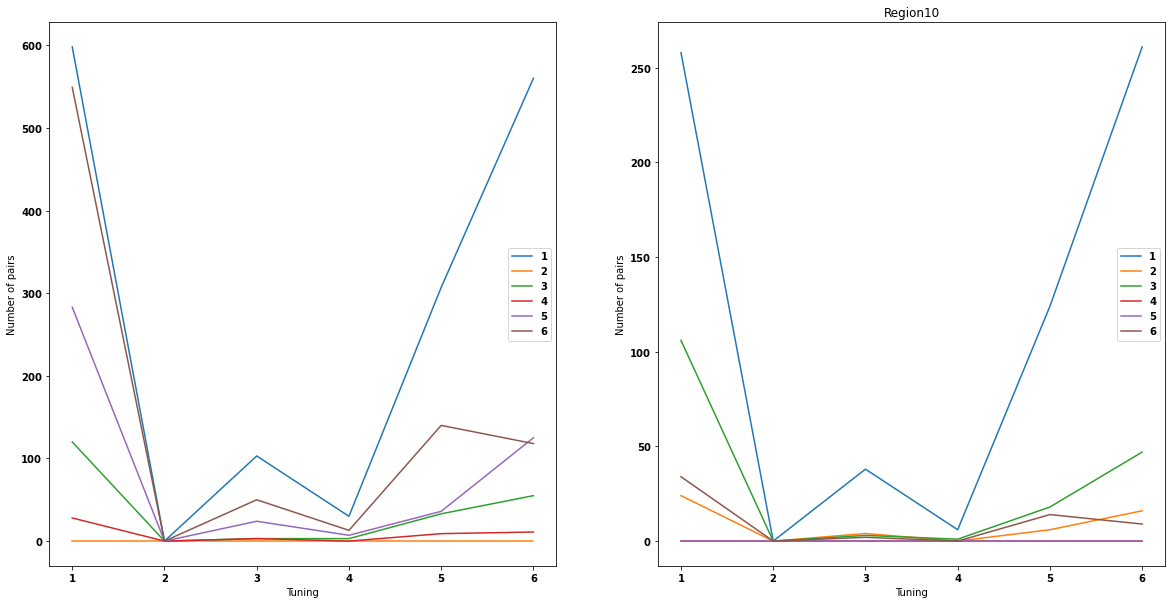

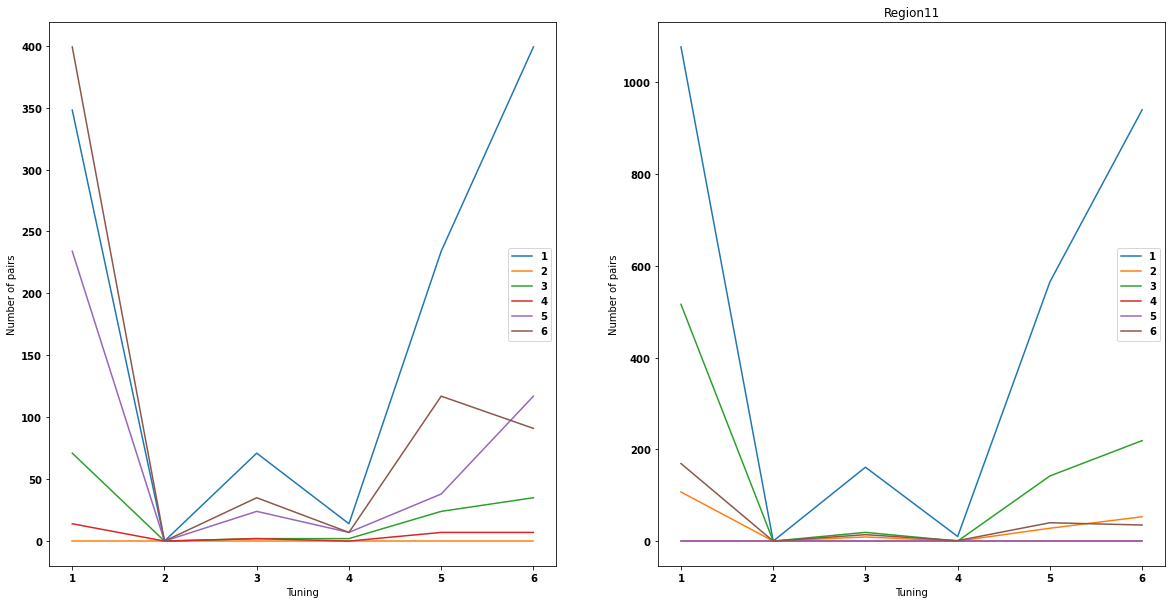

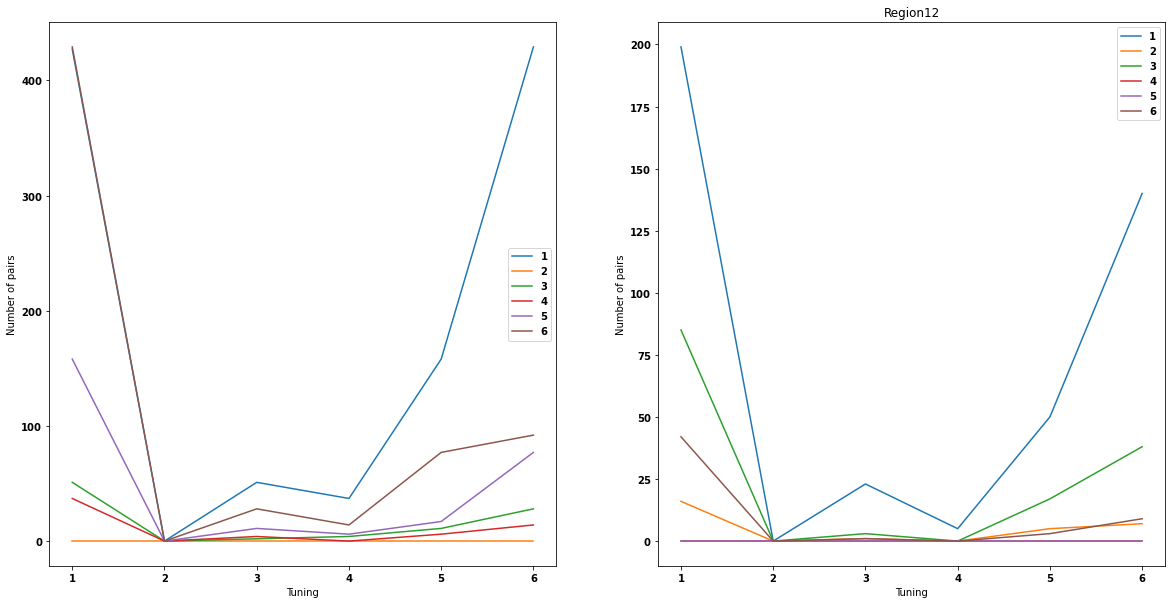

In [ ]:
#lenghts of each trial
import matplotlib
index = [0, 118, 88, 100, 98, 109, 78, 121, 76, 113, 97, 112, 118]
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)
neur_cont_df = pd.DataFrame(columns=['1an', '2an', '3an', '4an', '5an', '6an' ,'1aw', '2aw', '3aw', '4aw', '5aw', '6aw'])
reg = 1
for trial in range(1,len(index)):
    
    index, dat_tr, dat_stan, dat_staw, ind_stan, ind_staw = divide_data(index, trial, mat_load, ind_load)
    
    for sesion in range(4):

        #choose session
        dat_sean = dat_stan[:, sesion, :, :]
        dat_seaw = dat_staw[:, sesion, :, :]
        ind_sean = ind_stan[:, sesion, :, :]
        ind_seaw = ind_staw[:, sesion, :, :]

        #make dict to convert to dataframe
        for num in range(0,5):
            dat_df_an, dat_df_aw = make_dict_one_speaker(index, trial, lista[sesion], dat_sean, dat_seaw, num, ind_sean, ind_seaw)
            #exclude the rows/columns which index is not in the other dataframe
            df_corr_an, df_corr_aw = exclude_nan(dat_df_an, dat_df_aw)
            #df_corr_an, df_corr_aw = dat_df_an.dropna(how='all', axis=1).dropna(how='all', axis=0), dat_df_aw.dropna(how='all', axis=1).dropna(how='all', axis=0)
            
            df1 = df_corr_an.stack().reset_index()
            #set column names
            df1.columns = ['first', 'second', num+1]
            if(num==0):
                all_speakan_corr = df1
            else:
                all_speakan_corr[num+1] = df1[num+1]
            
            df2 = df_corr_aw.stack().reset_index()
            #set column names
            df2.columns = ['first', 'second', num+1]
            if(num==0):
                all_speakaw_corr = df2
            else:
                all_speakaw_corr[num+1] = df2[num+1]

        m = all_speakan_corr[[1,2,3,4,5]].agg(['idxmax','max'], axis=1).mask(lambda x: x['max'].eq(0))
        all_speakan_corr = all_speakan_corr.join(m, how='left')

        m = all_speakaw_corr[[1,2,3,4,5]].agg(['idxmax','max'], axis=1).mask(lambda x: x['max'].eq(0))
        all_speakaw_corr = all_speakaw_corr.join(m, how='left')
            
        compare = pd.DataFrame()    
        compare['first'], compare['second'] = all_speakan_corr['first'], all_speakan_corr['second']
        compare['an'] = all_speakan_corr['idxmax']
        compare['aw'] = all_speakaw_corr['idxmax']

        all_speakan_corr = all_speakan_corr.drop([1, 2, 3, 4, 5, 'idxmax'], axis=1)
        all_speakan_corr.columns = ['first', 'second', 'corr']
        all_speakaw_corr = all_speakaw_corr.drop([1, 2, 3, 4, 5, 'idxmax'], axis=1)
        all_speakaw_corr.columns = ['first', 'second', 'corr']

        #make dict to convert to dataframe
        dat_df_an, dat_df_aw = make_dict(index, trial, lista[sesion], dat_sean, dat_seaw, ind_sean, ind_seaw)
        #exclude the rows/columns which index is not in the other dataframe
        df_corr_an, df_corr_aw = exclude_nan(dat_df_an, dat_df_aw)
        #df_corr_an, df_corr_aw = dat_df_an.dropna(how='all', axis=1).dropna(how='all', axis=0), dat_df_aw.dropna(how='all', axis=1).dropna(how='all', axis=0)
        
        tune_cat_tr = tune_cat[sesion][0 : len(df_corr_an), :, 0]
        tune_cat_stan = tune_cat_tr[:, 0]
        tune_cat_staw = tune_cat_tr[:, 1]
        
        #analization of the anes tuning
        x = tuning_analization(df_corr_an, tune_cat_stan)
        x = x.drop(['corr'], axis=1)
        all_speakan_corr = pd.merge(all_speakan_corr,x,how='inner', left_on = ['first','second'], right_on = ['first','second'])
        
        #analization of the anes tuning
        x = tuning_analization(df_corr_aw, tune_cat_staw)
        x = x.drop(['corr'], axis=1)
        all_speakaw_corr = pd.merge(all_speakaw_corr,x,how='inner', left_on = ['first','second'], right_on = ['first','second'])
        
        
        tun_pairs = all_speakan_corr[['first', 'tune_1']].drop_duplicates()

        all_speakan_corr['tune_2'] = [int(tun_pairs.loc[tun_pairs['first'] == x]['tune_1']) for x in all_speakan_corr['second']]
        all_speakaw_corr['tune_2'] = [int(tun_pairs.loc[tun_pairs['first'] == x]['tune_1']) for x in all_speakaw_corr['second']]

        all_speakan_corr = all_speakan_corr[all_speakan_corr['first'] != all_speakan_corr['second']]
        all_speakan_corr = all_speakan_corr[all_speakan_corr['corr'] > 0.5]
        all_speakan_corr = all_speakan_corr.reset_index(drop=True)

        all_speakaw_corr = all_speakaw_corr[all_speakaw_corr['first'] != all_speakaw_corr['second']]
        all_speakaw_corr = all_speakaw_corr[all_speakaw_corr['corr'] > 0.5]
        all_speakaw_corr = all_speakaw_corr.reset_index(drop=True)

        f,(ax1,ax2) = plt.subplots(1,2,sharey=False,figsize=(20, 10))

        #plotting an tuning
        num_neuran = []
        for i in range(1,7):
            an_spectun = all_speakan_corr[all_speakan_corr['tune_1'] == i]
            cnt_neur = an_spectun.nunique()['first']
            num_neuran.append(cnt_neur)
            num_tun = []
            for j in range(1,7):
                if(i != j):
                    num_tun.append(an_spectun[an_spectun['tune_2'] == j].shape[0])
                else:
                    num_tun.append(int(an_spectun[an_spectun['tune_2'] == j].shape[0]/2))
            ax1.plot(range(1,7), num_tun)
        ax1.legend(['1', '2', '3', '4', '5', '6'])
        ax1.set_xlabel('Tuning');ax1.set_ylabel('Number of pairs')

        #plotting aw tuning
        num_neuraw = []
        for i in range(1,7):
            aw_spectun = all_speakaw_corr[all_speakaw_corr['tune_1'] == i]
            cnt_neur = aw_spectun.nunique()['first']
            num_neuraw.append(cnt_neur)
            num_tun = []
            for j in range(1,7):
                if(i != j):
                    num_tun.append(aw_spectun[aw_spectun['tune_2'] == j].shape[0])
                else:
                    num_tun.append(int(aw_spectun[aw_spectun['tune_2'] == j].shape[0]/2))
            ax2.plot(range(1,7), num_tun)
        ax2.legend(['1', '2', '3', '4', '5', '6'])
        ax2.set_xlabel('Tuning');ax2.set_ylabel('Number of pairs')

        title = "Region" + str(reg)
        reg+=1
        plt.title(title)
        plt.show()

        dfan = pd.DataFrame(num_neuran).T
        dfan.columns = ['1an', '2an', '3an', '4an', '5an', '6an']
        dfaw = pd.DataFrame(num_neuraw).T
        dfaw.columns = ['1aw', '2aw', '3aw', '4aw', '5aw', '6aw']
        df = pd.concat([dfan, dfaw], axis=1)
        neur_cont_df = neur_cont_df.append(df)
        
        break

##### Analysis of connections between single neurons based on connections tuning categories

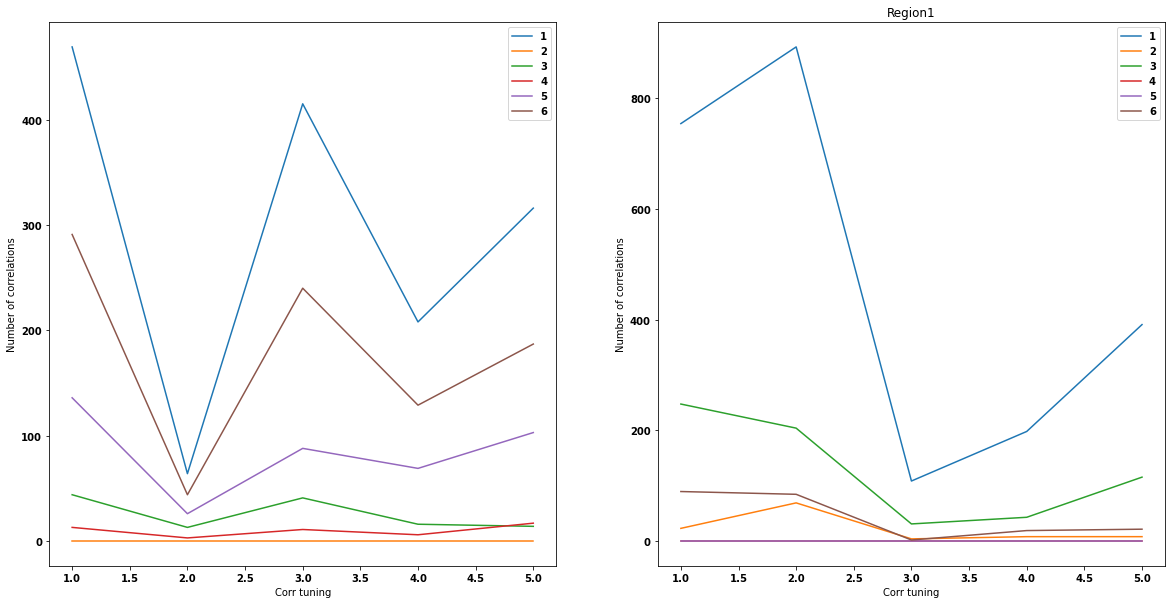

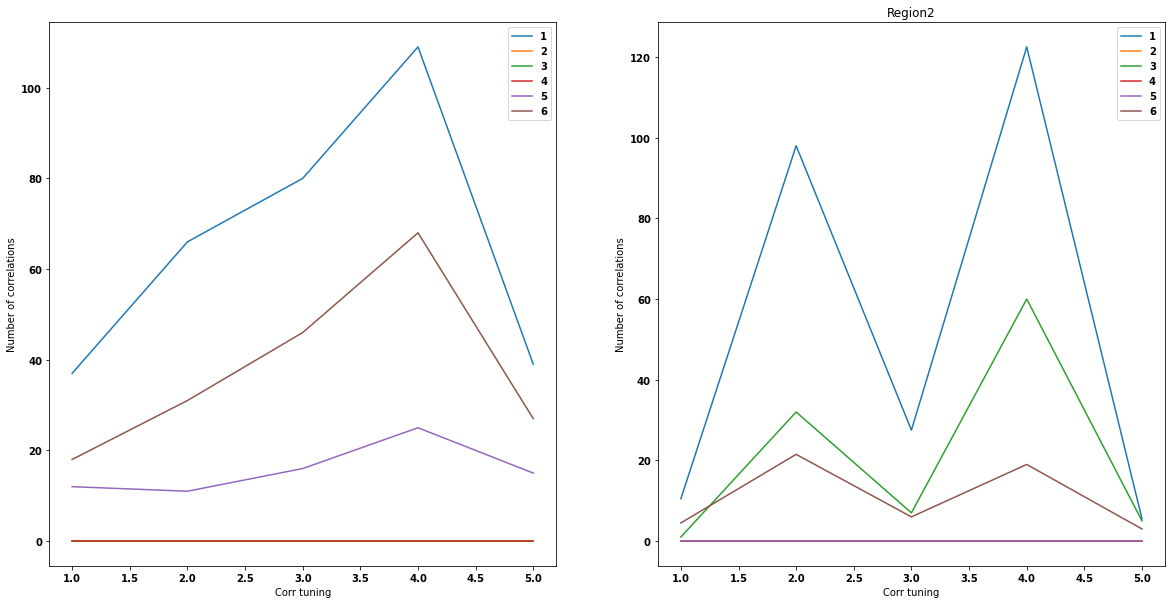

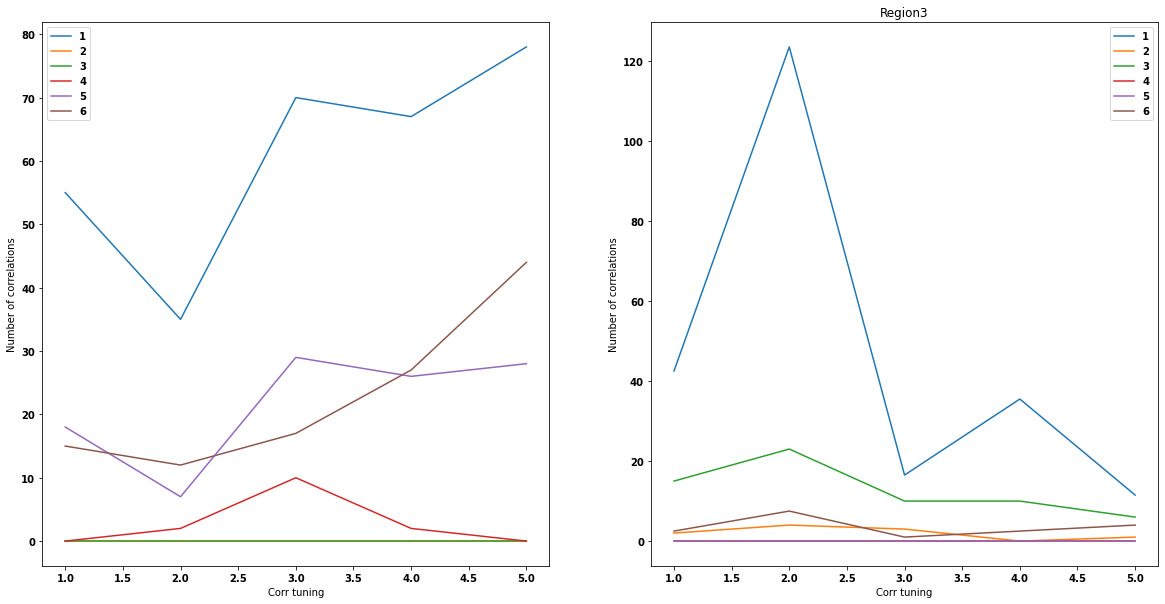

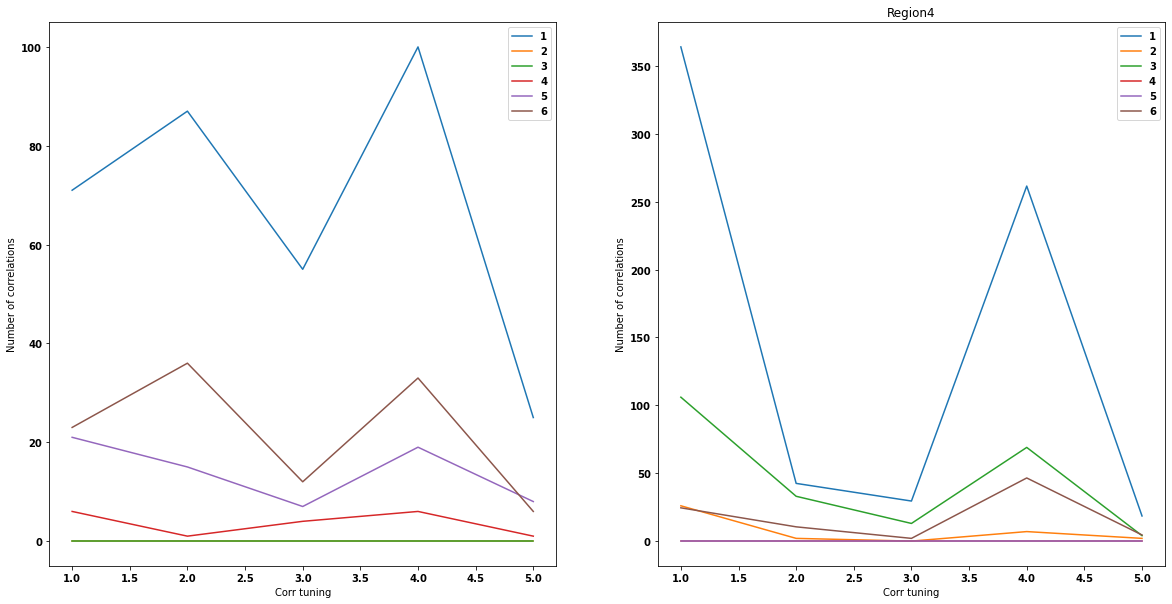

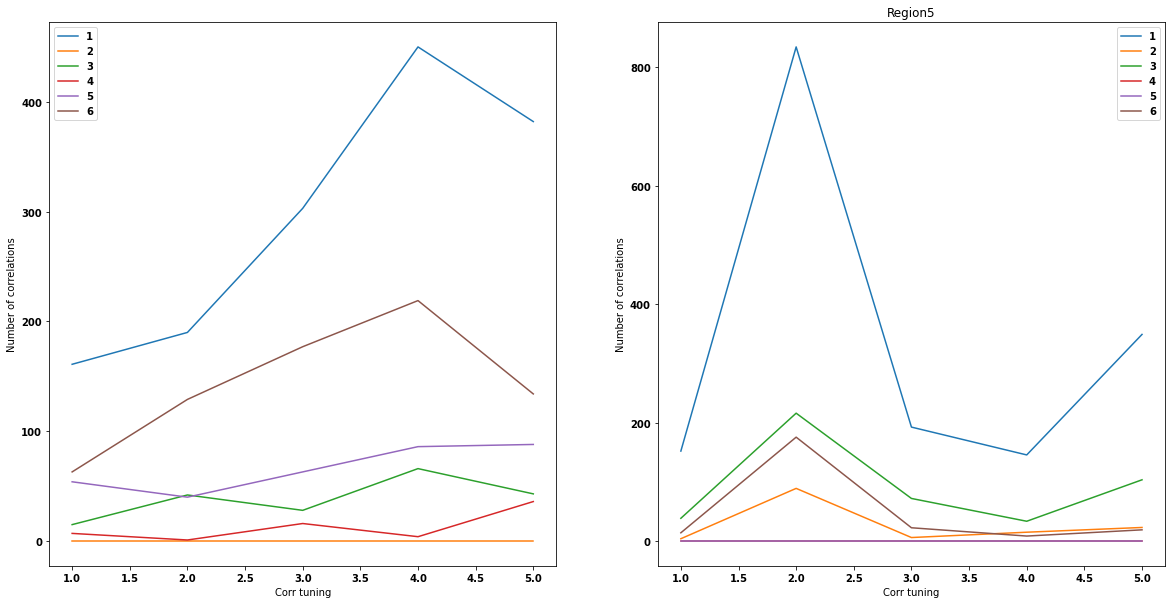

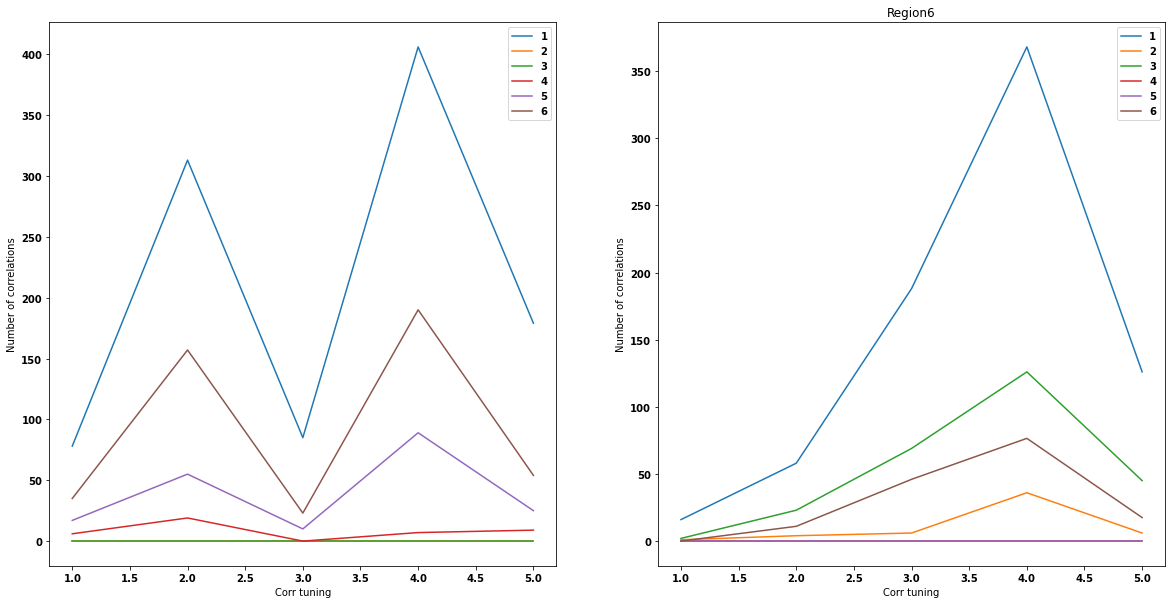

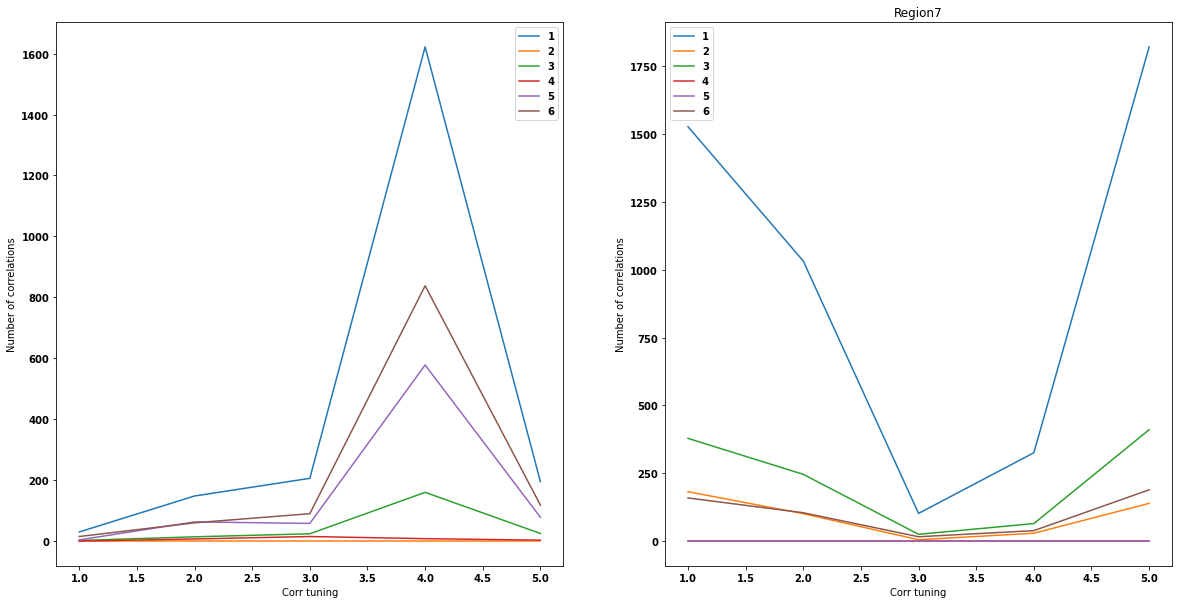

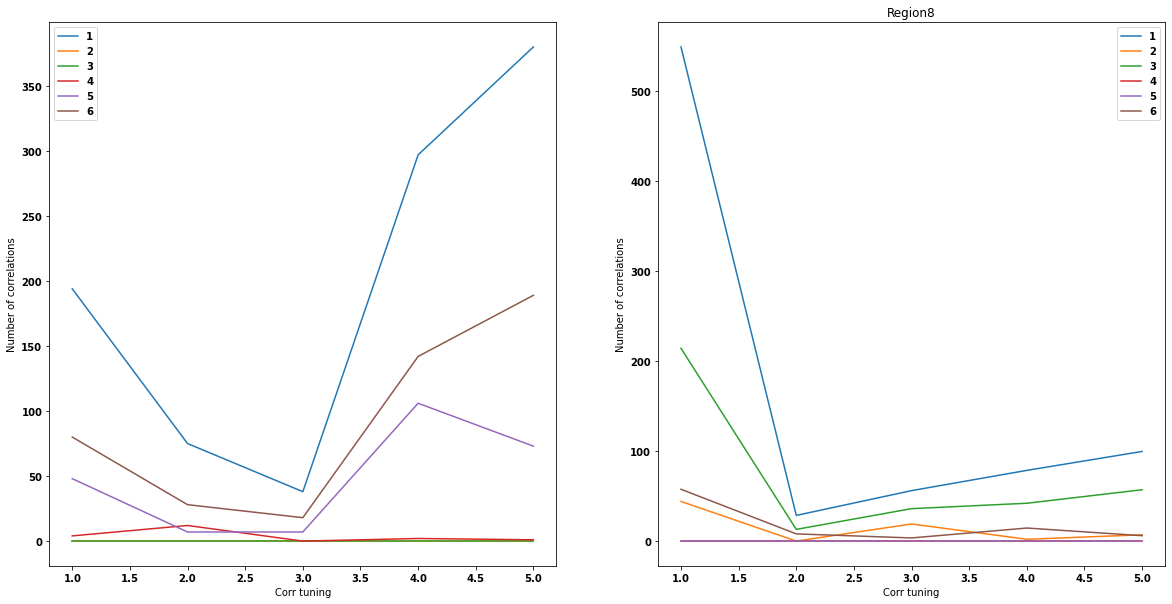

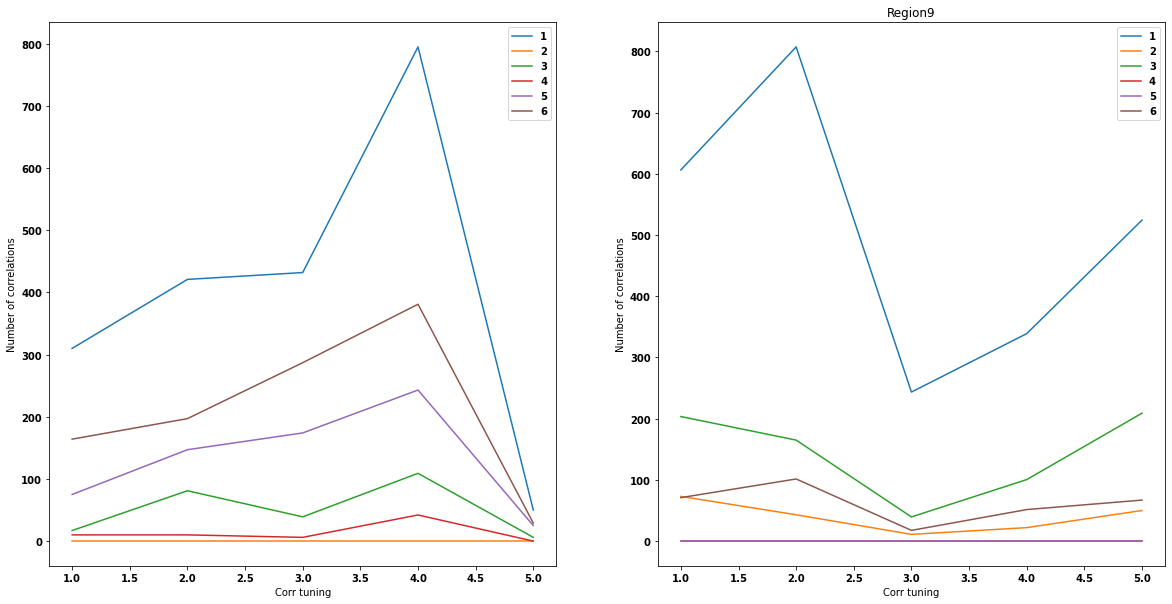

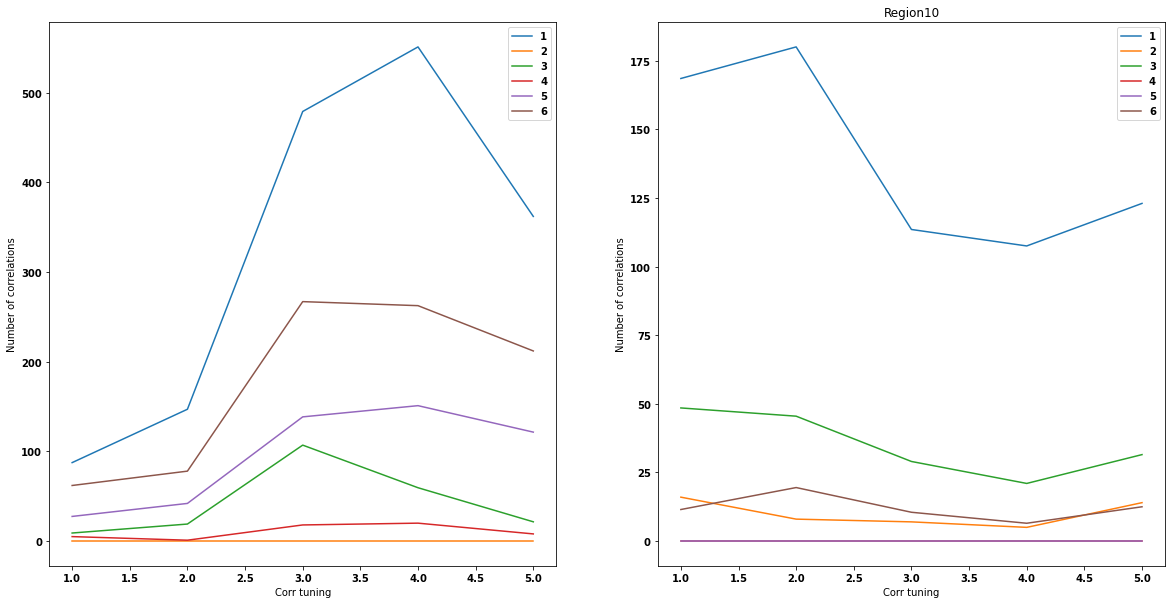

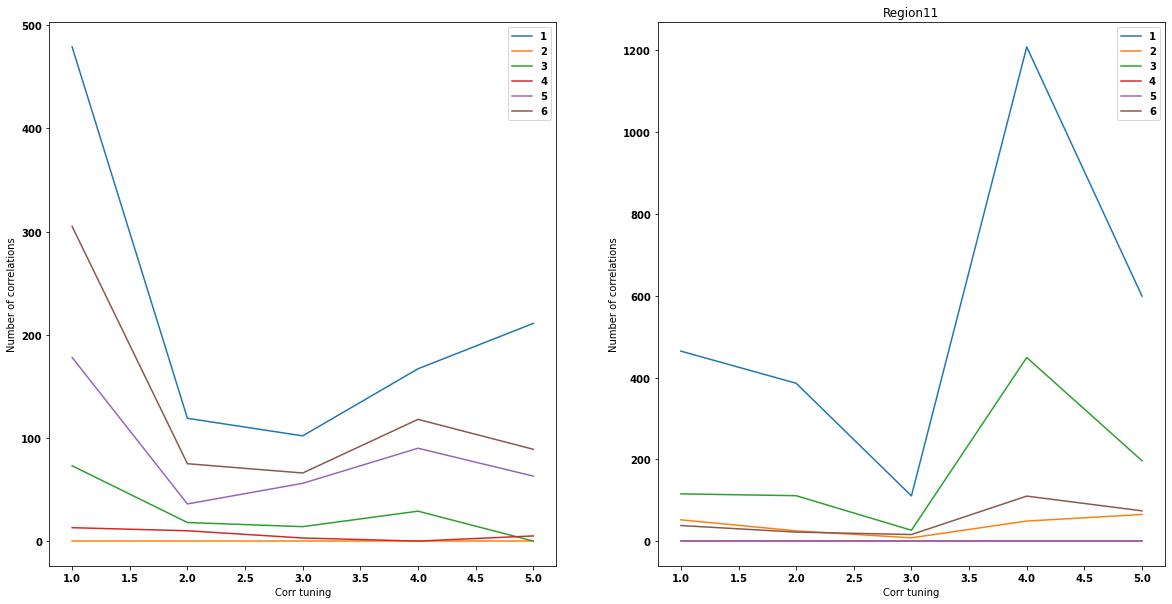

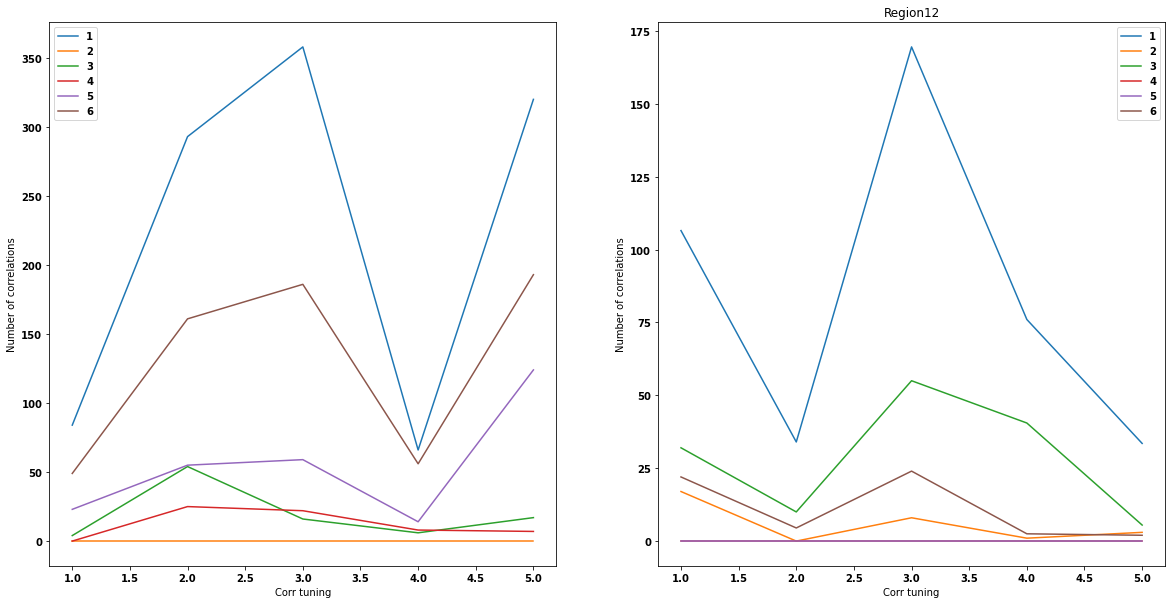

In [30]:
#lenghts of each trial
import matplotlib
index = [0, 118, 88, 100, 98, 109, 78, 121, 76, 113, 97, 112, 118]
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)
neur_cont_df = pd.DataFrame(columns=['1an', '2an', '3an', '4an', '5an', '6an' ,'1aw', '2aw', '3aw', '4aw', '5aw', '6aw'])
reg = 1
for trial in range(1,len(index)):
    
    index, dat_tr, dat_stan, dat_staw, ind_stan, ind_staw = divide_data(index, trial, mat_load, ind_load)
    
    for sesion in range(4):

        #choose session
        dat_sean = dat_stan[:, sesion, :, :]
        dat_seaw = dat_staw[:, sesion, :, :]
        ind_sean = ind_stan[:, sesion, :, :]
        ind_seaw = ind_staw[:, sesion, :, :]

        #make dict to convert to dataframe
        for num in range(0,5):
            dat_df_an, dat_df_aw = make_dict_one_speaker(index, trial, lista[sesion], dat_sean, dat_seaw, num, ind_sean, ind_seaw)
            #exclude the rows/columns which index is not in the other dataframe
            df_corr_an, df_corr_aw = exclude_nan(dat_df_an, dat_df_aw)
            #df_corr_an, df_corr_aw = dat_df_an.dropna(how='all', axis=1).dropna(how='all', axis=0), dat_df_aw.dropna(how='all', axis=1).dropna(how='all', axis=0)
            
            df1 = df_corr_an.stack().reset_index()
            #set column names
            df1.columns = ['first', 'second', num+1]
            if(num==0):
                all_speakan_corr = df1
            else:
                all_speakan_corr[num+1] = df1[num+1]
            
            df2 = df_corr_aw.stack().reset_index()
            #set column names
            df2.columns = ['first', 'second', num+1]
            if(num==0):
                all_speakaw_corr = df2
            else:
                all_speakaw_corr[num+1] = df2[num+1]

        m = all_speakan_corr[[1,2,3,4,5]].agg(['idxmax','max'], axis=1).mask(lambda x: x['max'].eq(0))
        all_speakan_corr = all_speakan_corr.join(m, how='left')

        m = all_speakaw_corr[[1,2,3,4,5]].agg(['idxmax','max'], axis=1).mask(lambda x: x['max'].eq(0))
        all_speakaw_corr = all_speakaw_corr.join(m, how='left')
            
        compare = pd.DataFrame()    
        compare['first'], compare['second'] = all_speakan_corr['first'], all_speakan_corr['second']
        compare['an'] = all_speakan_corr['idxmax']
        compare['aw'] = all_speakaw_corr['idxmax']

        all_speakan_corr = all_speakan_corr.drop([1, 2, 3, 4, 5], axis=1)
        all_speakan_corr.columns = ['first', 'second', 'idxmax', 'corr']
        all_speakaw_corr = all_speakaw_corr.drop([1, 2, 3, 4, 5], axis=1)
        all_speakaw_corr.columns = ['first', 'second', 'idxmax', 'corr']
        
        #make dict to convert to dataframe
        dat_df_an, dat_df_aw = make_dict(index, trial, lista[sesion], dat_sean, dat_seaw, ind_sean, ind_seaw)
        #exclude the rows/columns which index is not in the other dataframe
        df_corr_an, df_corr_aw = exclude_nan(dat_df_an, dat_df_aw)
        #df_corr_an, df_corr_aw = dat_df_an.dropna(how='all', axis=1).dropna(how='all', axis=0), dat_df_aw.dropna(how='all', axis=1).dropna(how='all', axis=0)
        
        tune_cat_tr = tune_cat[sesion][0 : len(df_corr_an), :, 0]
        tune_cat_stan = tune_cat_tr[:, 0]
        tune_cat_staw = tune_cat_tr[:, 1]
        
        #analization of the anes tuning
        x = tuning_analization(df_corr_an, tune_cat_stan)
        x = x.drop(['corr'], axis=1)
        all_speakan_corr = pd.merge(all_speakan_corr,x,how='inner', left_on = ['first','second'], right_on = ['first','second'])
        
        #analization of the anes tuning
        x = tuning_analization(df_corr_aw, tune_cat_staw)
        x = x.drop(['corr'], axis=1)
        all_speakaw_corr = pd.merge(all_speakaw_corr,x,how='inner', left_on = ['first','second'], right_on = ['first','second'])
        
        tun_pairs = all_speakan_corr[['first', 'tune_1']].drop_duplicates()

        all_speakan_corr['tune_2'] = [int(tun_pairs.loc[tun_pairs['first'] == x]['tune_1']) for x in all_speakan_corr['second']]
        all_speakaw_corr['tune_2'] = [int(tun_pairs.loc[tun_pairs['first'] == x]['tune_1']) for x in all_speakaw_corr['second']]

        all_speakan_corr = all_speakan_corr[all_speakan_corr['first'] != all_speakan_corr['second']]
        all_speakan_corr = all_speakan_corr[all_speakan_corr['corr'] > 0.5]
        all_speakan_corr = all_speakan_corr.reset_index(drop=True)

        all_speakaw_corr = all_speakaw_corr[all_speakaw_corr['first'] != all_speakaw_corr['second']]
        all_speakaw_corr = all_speakaw_corr[all_speakaw_corr['corr'] > 0.5]
        all_speakaw_corr = all_speakaw_corr.reset_index(drop=True)

        f,(ax1,ax2) = plt.subplots(1,2,sharey=False,figsize=(20, 10))

        #plotting an tuning
        num_neuran = []
        for i in range(1,7):
            an_spectun = all_speakan_corr[all_speakan_corr['tune_1'] == i]
            cnt_neur = an_spectun.nunique()['first']
            num_neuran.append(cnt_neur)
            num_tun = []
            for j in range(1,6):
                num_tun.append(an_spectun[an_spectun['idxmax'] == j][all_speakan_corr['tune_1'] != all_speakan_corr['tune_2']].shape[0] +
                an_spectun[an_spectun['idxmax'] == j][all_speakan_corr['tune_1'] == all_speakan_corr['tune_2']].shape[0]/2)

            ax1.plot(range(1,6), num_tun)
        ax1.legend(['1', '2', '3', '4', '5', '6'])
        ax1.set_xlabel('Corr tuning');ax1.set_ylabel('Number of correlations')

        #plotting aw tuning
        num_neuraw = []
        for i in range(1,7):
            aw_spectun = all_speakaw_corr[all_speakaw_corr['tune_1'] == i]
            cnt_neur = aw_spectun.nunique()['first']
            num_neuraw.append(cnt_neur)
            num_tun = []
            for j in range(1,6):
                num_tun.append(aw_spectun[aw_spectun['idxmax'] == j][all_speakaw_corr['tune_1'] != all_speakaw_corr['tune_2']].shape[0] +
                aw_spectun[aw_spectun['idxmax'] == j][all_speakaw_corr['tune_1'] == all_speakaw_corr['tune_2']].shape[0]/2)
            
            ax2.plot(range(1,6), num_tun)
        ax2.legend(['1', '2', '3', '4', '5', '6'])
        ax2.set_xlabel('Corr tuning');ax2.set_ylabel('Number of correlations')

        title = "Region" + str(reg)
        reg+=1
        plt.title(title)
        plt.show()

        dfan = pd.DataFrame(num_neuran).T
        dfan.columns = ['1an', '2an', '3an', '4an', '5an', '6an']
        dfaw = pd.DataFrame(num_neuraw).T
        dfaw.columns = ['1aw', '2aw', '3aw', '4aw', '5aw', '6aw']
        df = pd.concat([dfan, dfaw], axis=1)
        neur_cont_df = neur_cont_df.append(df)
        
        break

In [32]:
print(neur_cont_df)
neur_cont_df.to_csv("C:/Users/m.nedeljkovic/Desktop/count.csv")

  1an 2an 3an 4an 5an 6an 1aw 2aw 3aw 4aw 5aw 6aw
0  46   0   4   1  12  20  62   3  12   0   0   6
0  22   0   0   0   3  10  22   0   6   0   0   3
0  41   0   0   1   8  14  45   2  11   0   0   4
0  42   0   0   1   7  14  43   2  10   0   0   5
0  44   0   4   1   9  20  57   3  12   0   0   6
0  38   0   0   1   6  13  41   2  11   0   0   5
0  54   0   5   1  15  23  74   5  14   0   0   6
0  37   0   0   1   6  13  39   2  11   0   0   5
0  47   0   4   1  14  21  63   3  13   0   0   5
0  44   0   4   1  11  20  59   3  12   0   0   6
0  48   0   4   1  15  22  69   3  13   0   0   6
0  44   0   4   1   9  20  55   3  12   0   0   6
